In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('request_log_http.log', sep='\t', on_bad_lines='skip')



In [6]:
df

URL                  Start Time  \
0       www.reuters.com  2024-12-27 17:55:24.776462   
1       www.reuters.com  2024-12-27 17:55:24.723688   
2       www.reuters.com  2024-12-27 17:55:24.843909   
3       www.reuters.com  2024-12-27 17:55:24.856324   
4       www.reuters.com  2024-12-27 17:55:24.902486   
...                         ...                         ...   
4969    www.foxnews.com  2024-12-28 05:33:23.935420   
4970   www.bbc.com/news  2024-12-28 05:33:23.819709   
4971   www.bbc.com/news  2024-12-28 05:33:23.822446   
4972   www.bbc.com/news  2024-12-28 05:33:45.843878   
4973  www.economist.com  2024-12-28 05:33:24.099562   

                        End Time      RTT (ms)  Status Code  \
0     2024-12-27 17:55:25.516692  7.402300e+02        200.0   
1     2024-12-27 17:55:25.607295  8.836070e+02        200.0   
2     2024-12-27 17:55:25.612656  7.687470e+02        200.0   
3     2024-12-27 17:55:25.614326  7.580020e+02        200.0   
4     2024-12-27 17:55:25.922225  1.019739e+03        200.0   
...                          ...           ...          ...   
4969  2024-12-28 18:38:00.462578  4.707653e+07        200.0   
4970  2024-12-28 18:38:35.846245  4.711203e+07        200.0   
4971  2024-12-28 18:38:35.930926  4.711211e+07        200.0   
4972  2024-12-28 18:38:35.956617  4.709011e+07        200.0   
4973  2024-12-28 18:38:38.946465  4.711485e+07        200.0   

      Content Size (bytes)  Throughput (bytes/ms)  
0                  12045.0              16.271970  
1                  12045.0              13.631626  
2                  12045.0              15.668354  
3                  12045.0              15.890459  
4                  12045.0              11.811846  
...                    ...                    ...  
4969             5159024.0               0.109588  
4970             2527374.0               0.053646  
4971             2759534.0               0.058574  
4972             2546485.0               0.054077  
4973            10390632.0               0.220538  

[4974 rows x 7 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   URL                    4972 non-null   object 
 1   Start Time             4970 non-null   object 
 2   End Time               4967 non-null   object 
 3   RTT (ms)               4964 non-null   float64
 4   Status Code            4963 non-null   float64
 5   Content Size (bytes)   4963 non-null   float64
 6   Throughput (bytes/ms)  4963 non-null   float64
dtypes: float64(4), object(3)
memory usage: 272.1+ KB


In [11]:
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')

# Menghapus baris dengan 'Start Time' yang tidak valid (NaT)
df = df.dropna(subset=['Start Time'])

# Membuat kolom baru 'Start Time (Rounded)' dengan menghilangkan mikrodetik
df['Start Time (Rounded)'] = df['Start Time'].dt.floor('S')

# Mengelompokkan berdasarkan 'Start Time (Rounded)' dan menghitung jumlah request
grouped_df = df.groupby('Start Time (Rounded)').size().reset_index(name='Request Count')

# Menampilkan dataframe baru
print(grouped_df)

     Start Time (Rounded)  Request Count
0     2024-12-27 17:55:24             79
1     2024-12-27 17:55:25             26
2     2024-12-27 17:55:26              2
3     2024-12-27 17:55:33              1
4     2024-12-27 17:55:34              1
...                   ...            ...
2016  2024-12-28 05:34:44             85
2017  2024-12-28 05:34:53            155
2018  2024-12-28 05:34:54            173
2019  2024-12-28 05:34:55            344
2020  2024-12-28 05:34:56             52

[2021 rows x 2 columns]


C:\Users\Hp\AppData\Local\Temp\ipykernel_29120\974405710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Time (Rounded)'] = df['Start Time'].dt.floor('S')


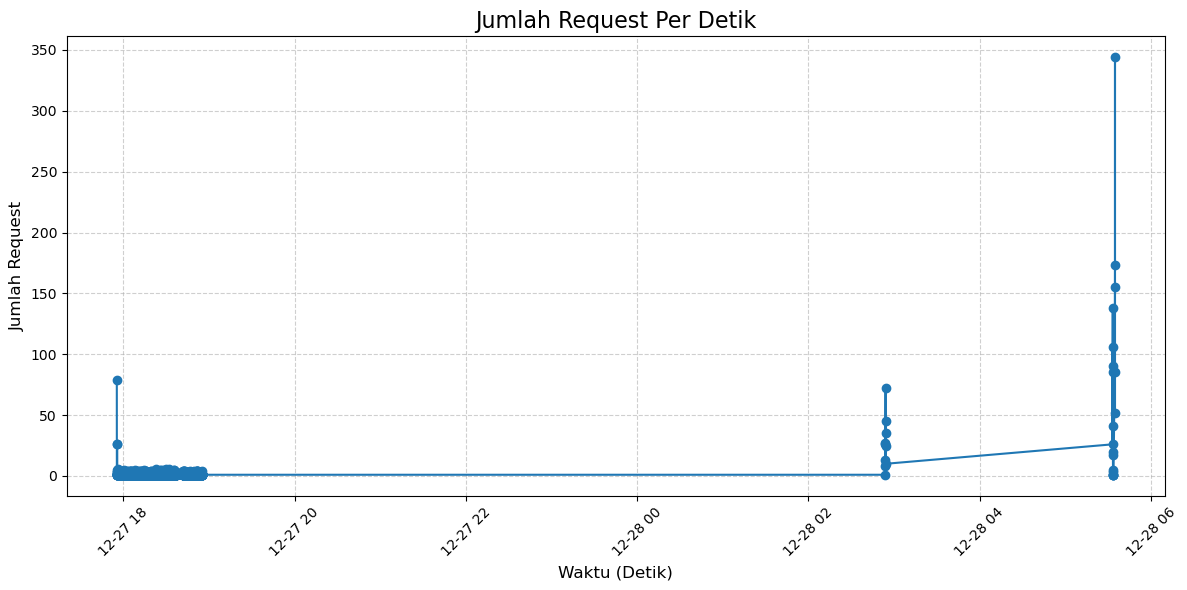

In [12]:
import matplotlib.pyplot as plt

# Membuat line plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Start Time (Rounded)'], grouped_df['Request Count'], marker='o', linestyle='-')

# Menambahkan judul dan label
plt.title('Jumlah Request Per Detik', fontsize=16)
plt.xlabel('Waktu (Detik)', fontsize=12)
plt.ylabel('Jumlah Request', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Menyesuaikan rotasi sumbu-x untuk keterbacaan
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()


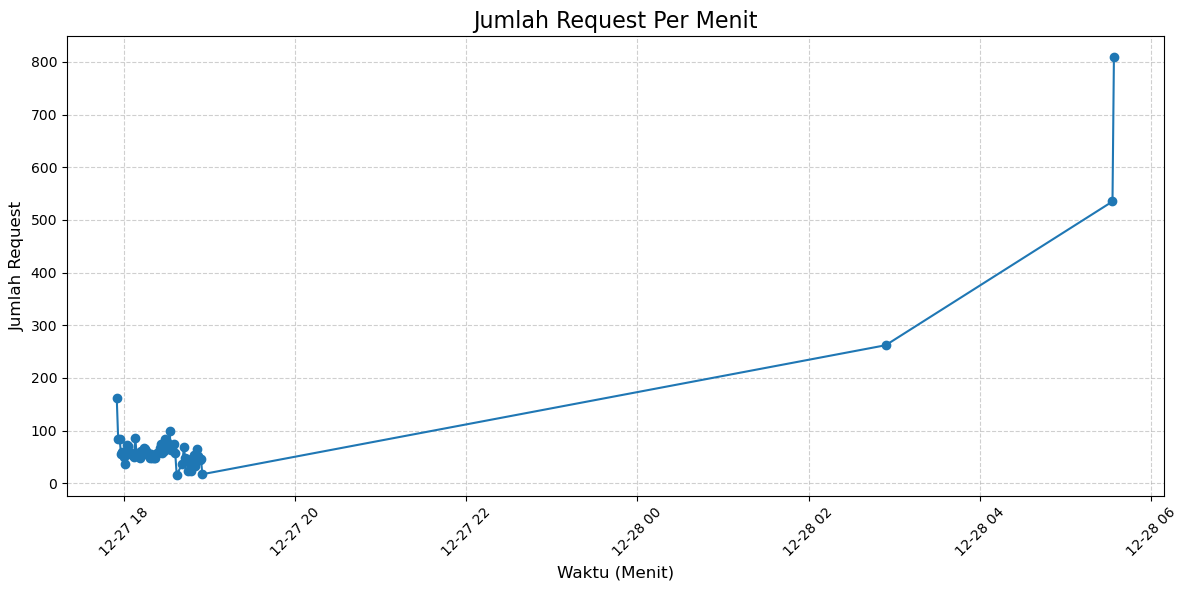

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file log
df = pd.read_csv('request_log_http.log', sep='\t', on_bad_lines='skip')

# Mengubah kolom 'Start Time' menjadi format datetime dan menangani nilai tidak valid
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df = df.dropna(subset=['Start Time'])  # Hapus baris dengan nilai tidak valid

# Membuat kolom 'Start Time (Rounded)' untuk data per detik
df['Start Time (Rounded)'] = df['Start Time'].dt.floor('S')  # Membulatkan ke detik

# Membuat kolom 'Start Time (Minute)' untuk visualisasi per menit
df['Start Time (Minute)'] = df['Start Time'].dt.floor('T')  # Membulatkan ke menit

# Mengelompokkan berdasarkan menit dan menghitung jumlah total request per menit
grouped_per_minute = df.groupby('Start Time (Minute)').size().reset_index(name='Request Count')

# Membuat line plot berdasarkan data per menit
plt.figure(figsize=(12, 6))
plt.plot(grouped_per_minute['Start Time (Minute)'], grouped_per_minute['Request Count'], marker='o', linestyle='-')

# Menambahkan judul dan label
plt.title('Jumlah Request Per Menit', fontsize=16)
plt.xlabel('Waktu (Menit)', fontsize=12)
plt.ylabel('Jumlah Request', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Menyesuaikan tampilan sumbu X
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()


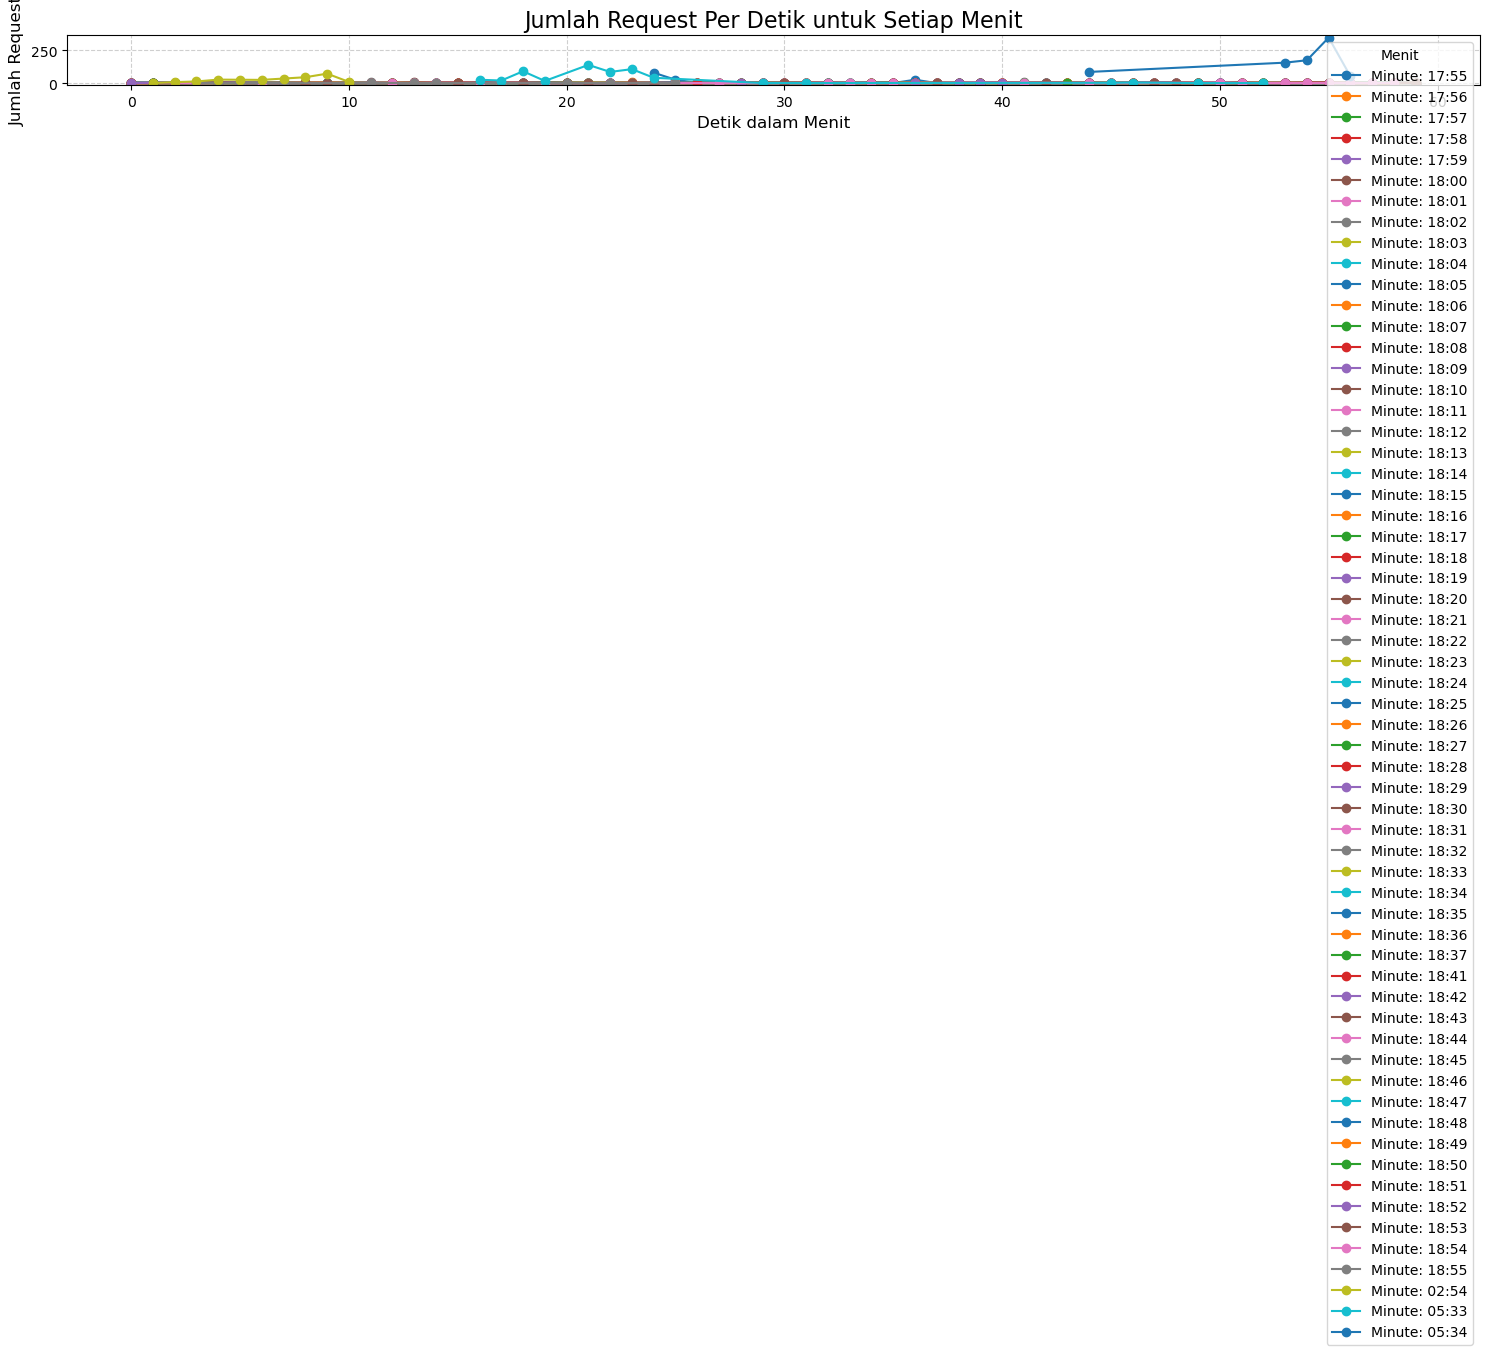

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file log
df = pd.read_csv('request_log_http.log', sep='\t', on_bad_lines='skip')

# Mengubah kolom 'Start Time' menjadi format datetime dan menangani nilai tidak valid
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df = df.dropna(subset=['Start Time'])  # Hapus baris dengan nilai tidak valid

# Membulatkan waktu ke detik dan menit
df['Start Time (Rounded)'] = df['Start Time'].dt.floor('S')  # Membulatkan ke detik
df['Start Time (Minute)'] = df['Start Time'].dt.floor('T')  # Membulatkan ke menit

# Mengelompokkan data berdasarkan menit
minutes = df['Start Time (Minute)'].unique()  # Ambil daftar menit unik

# Membuat banyak plot untuk setiap menit
plt.figure(figsize=(15, 8))
for minute in minutes:
    # Filter data untuk menit tertentu
    data_per_minute = df[df['Start Time (Minute)'] == minute]
    
    # Hitung jumlah request per detik dalam menit tersebut
    grouped_per_second = data_per_minute.groupby('Start Time (Rounded)').size().reset_index(name='Request Count')
    
    # Plot data per menit
    plt.plot(
        grouped_per_second['Start Time (Rounded)'].dt.second,  # Detik dalam menit
        grouped_per_second['Request Count'],
        marker='o',
        linestyle='-',
        label=f'Minute: {minute.strftime("%H:%M")}'  # Label berdasarkan waktu
    )

# Menambahkan judul dan label
plt.title('Jumlah Request Per Detik untuk Setiap Menit', fontsize=16)
plt.xlabel('Detik dalam Menit', fontsize=12)
plt.ylabel('Jumlah Request', fontsize=12)
plt.legend(title='Menit', fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Menampilkan plot
plt.tight_layout()
plt.show()


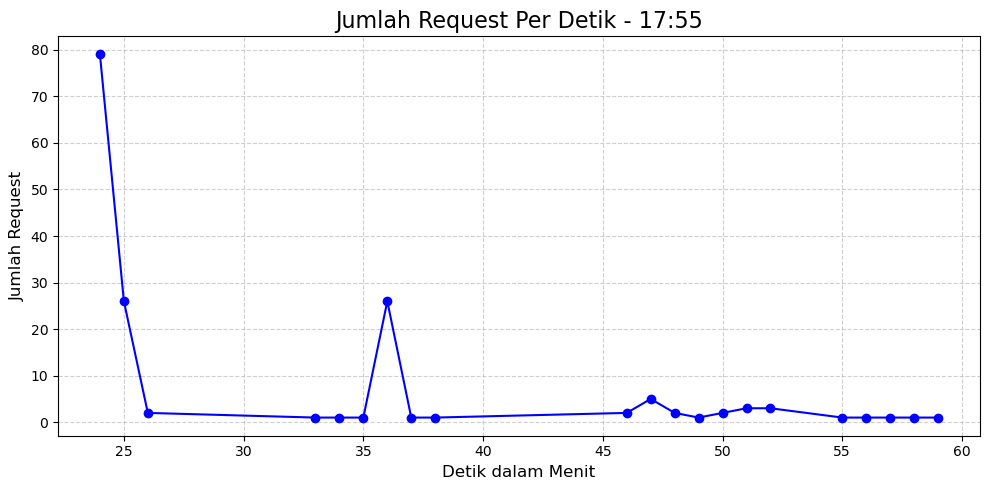

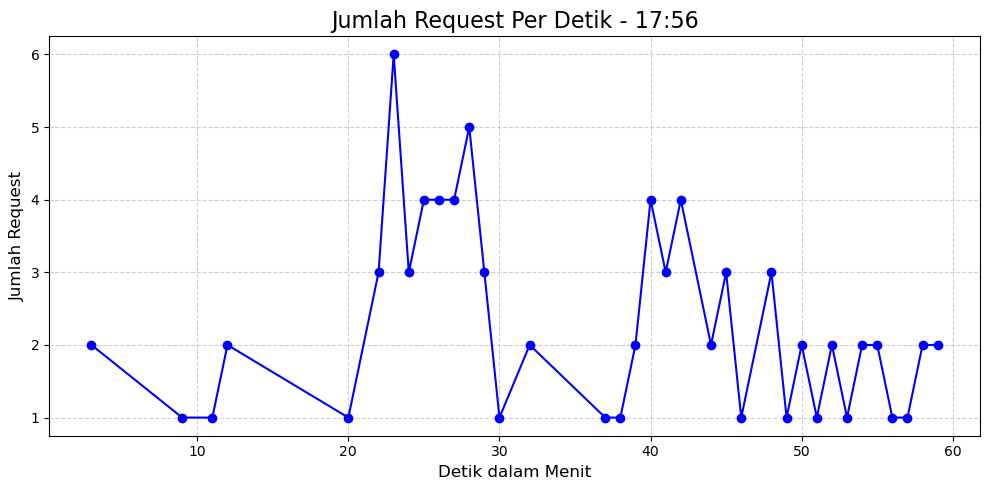

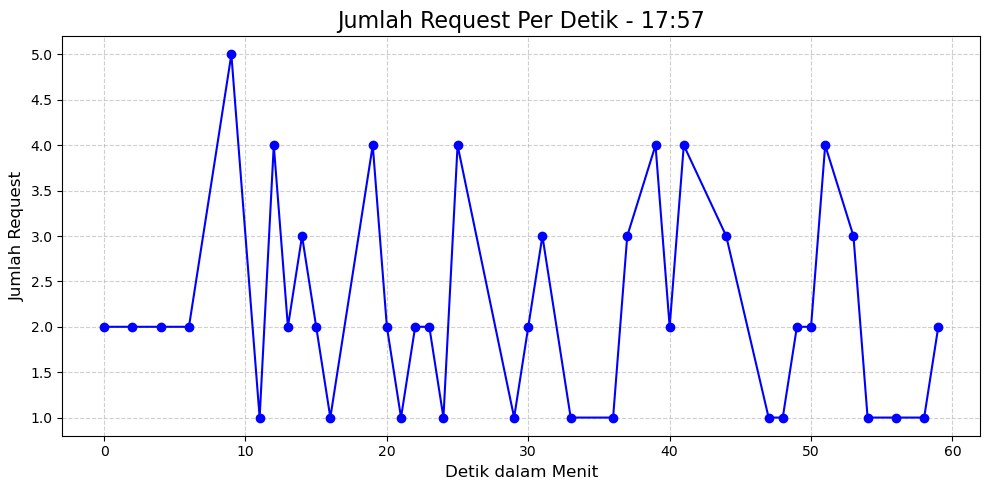

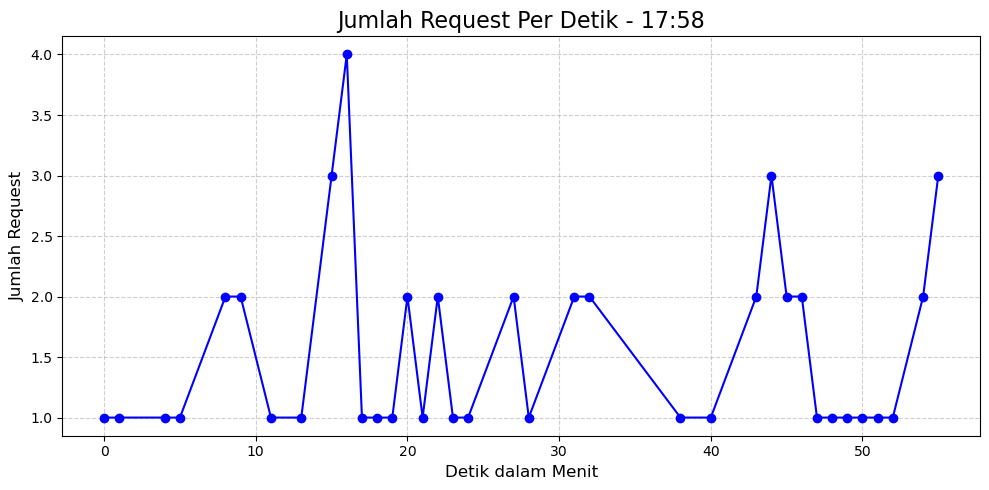

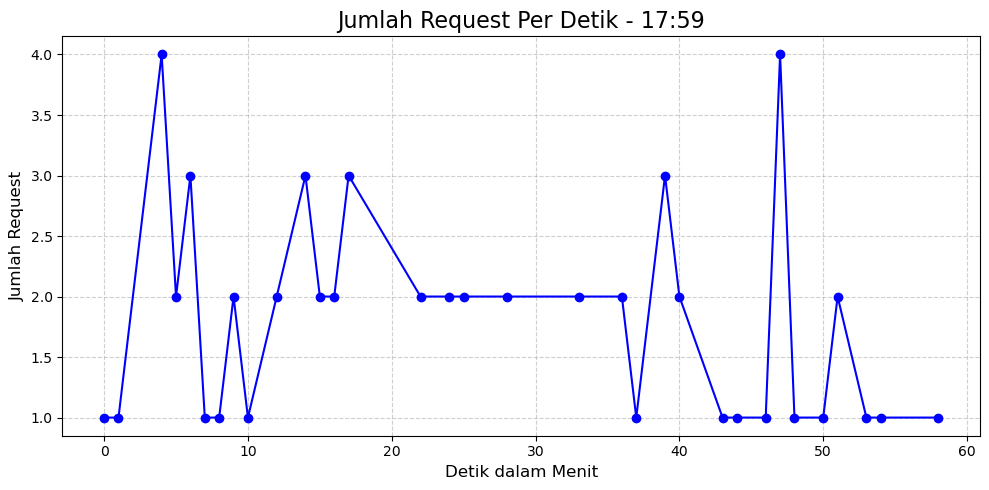

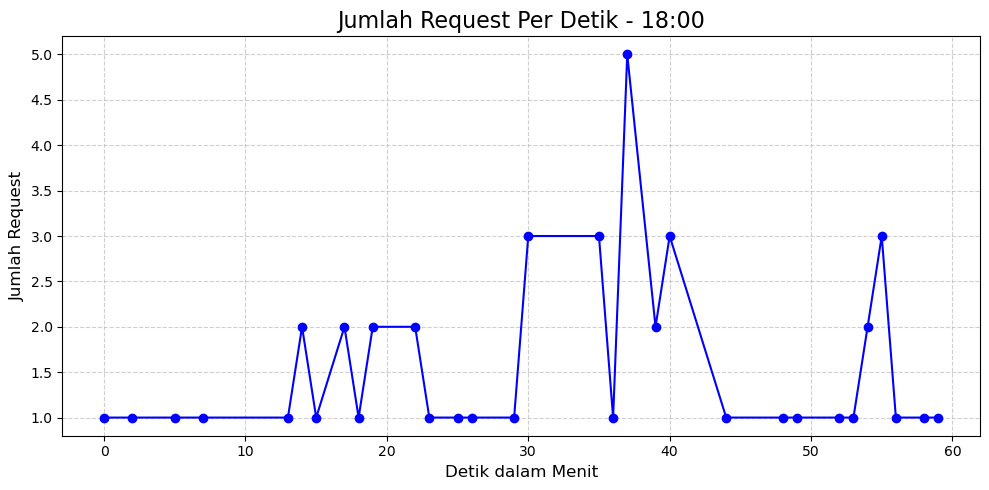

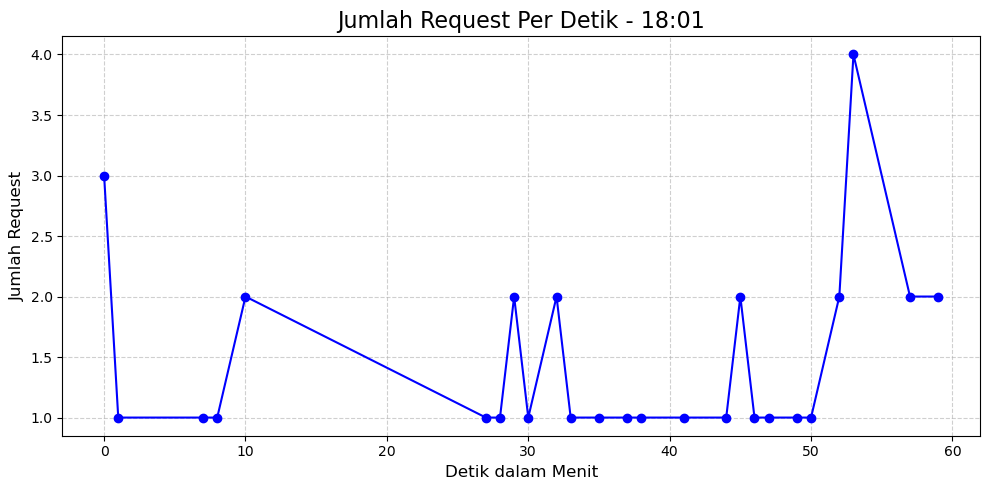

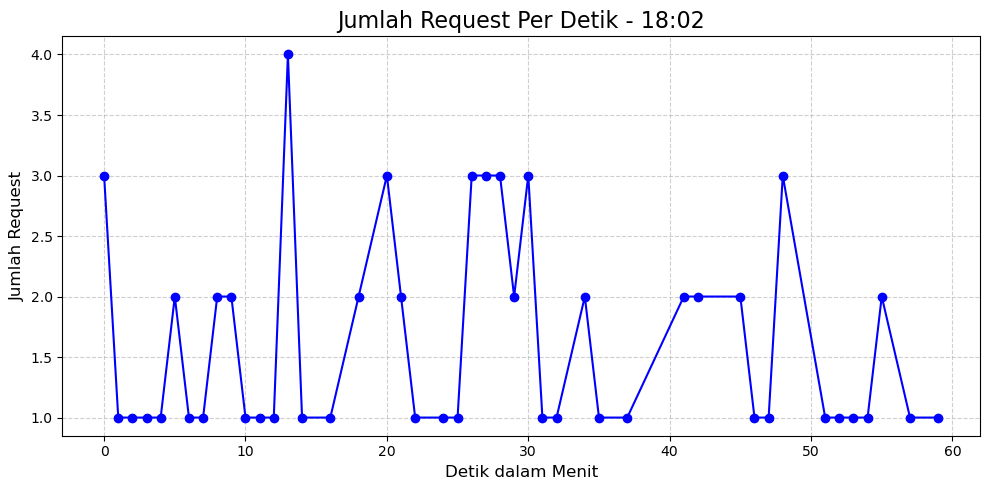

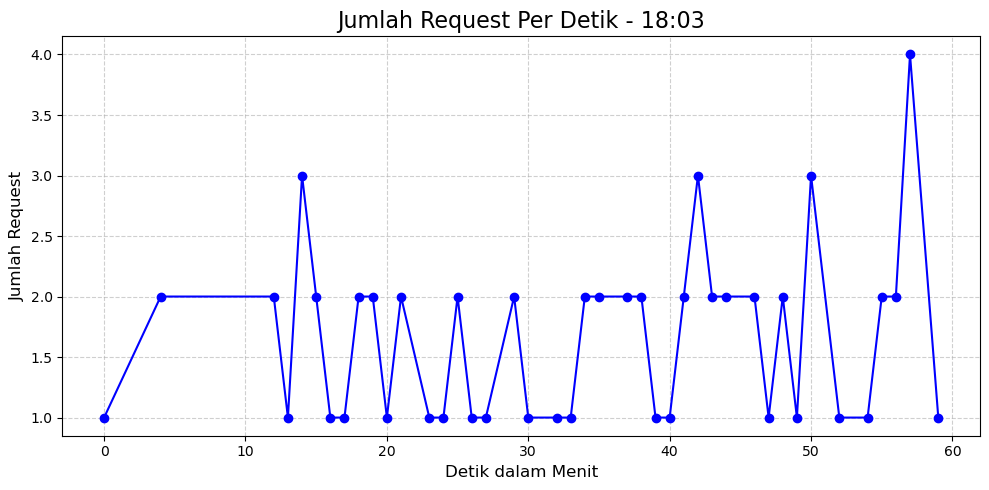

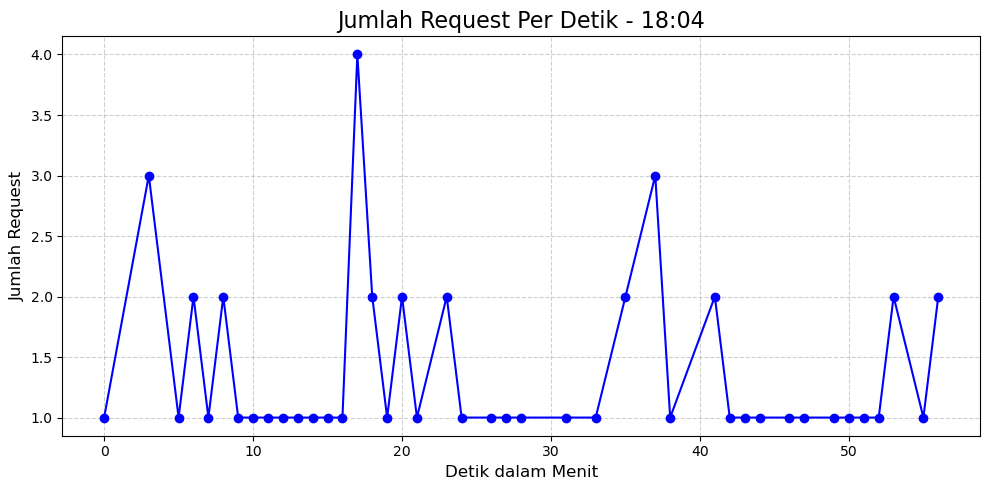

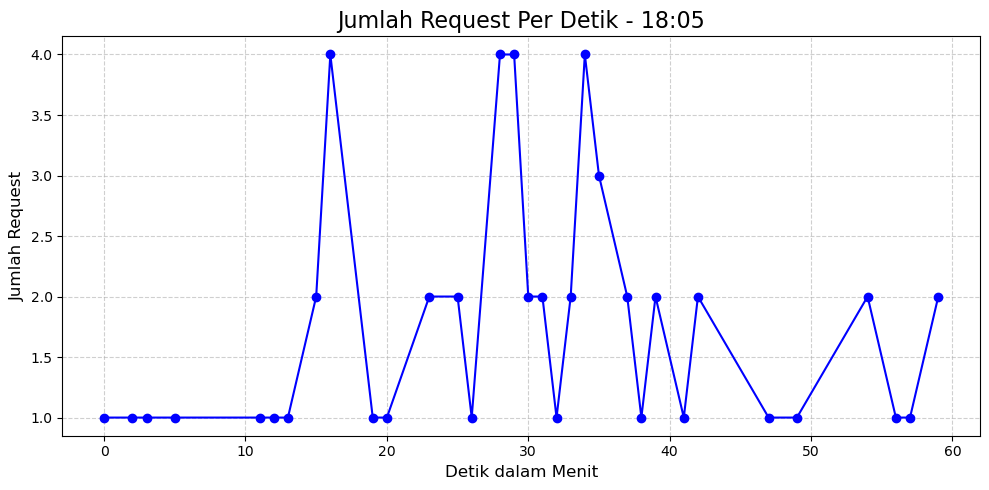

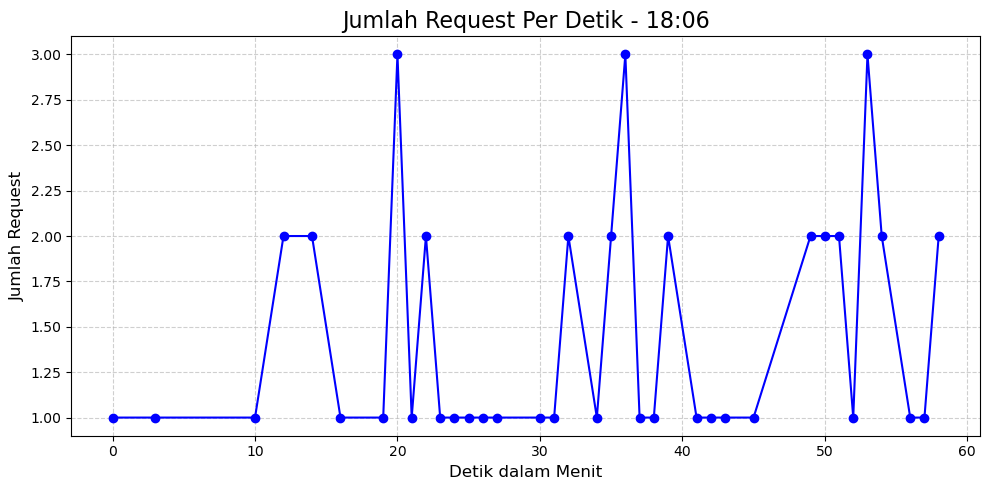

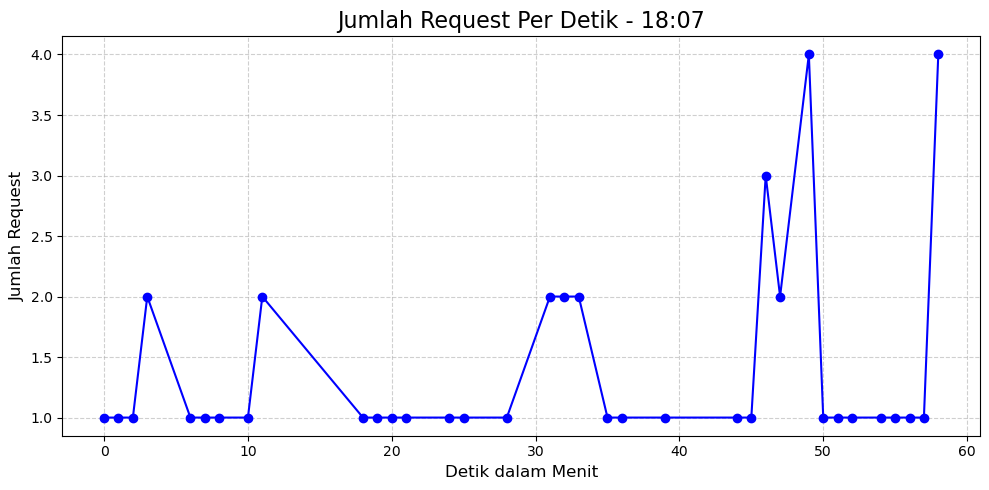

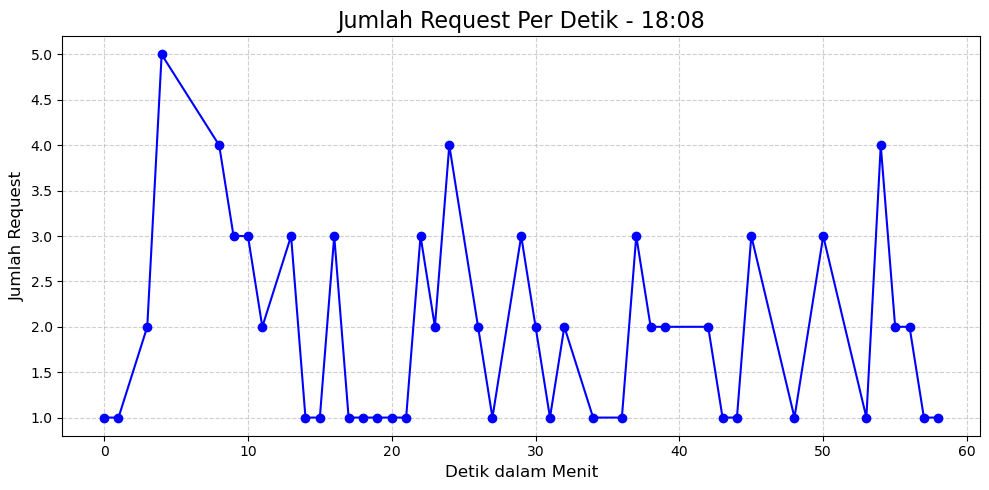

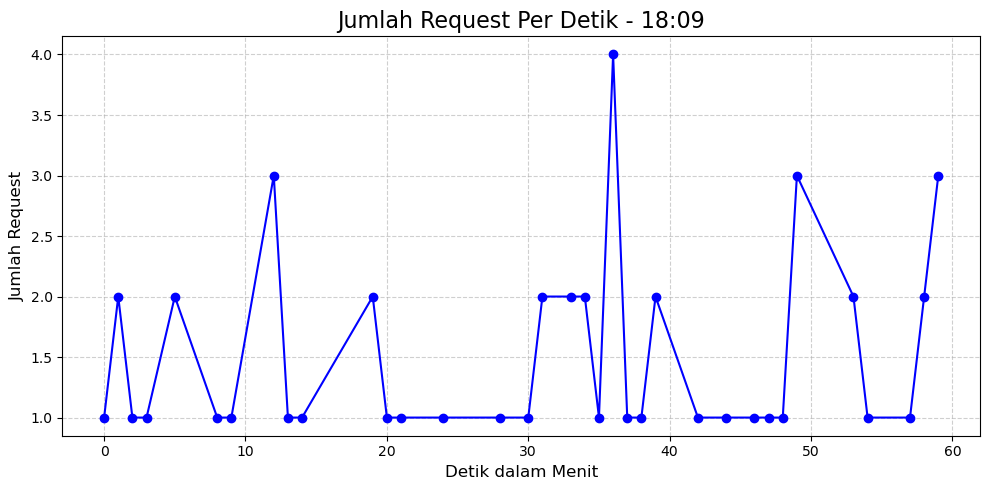

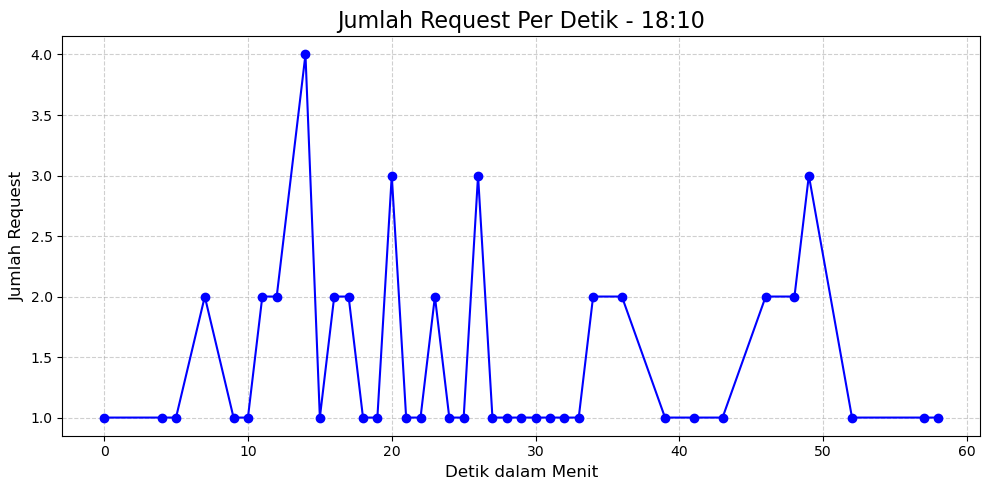

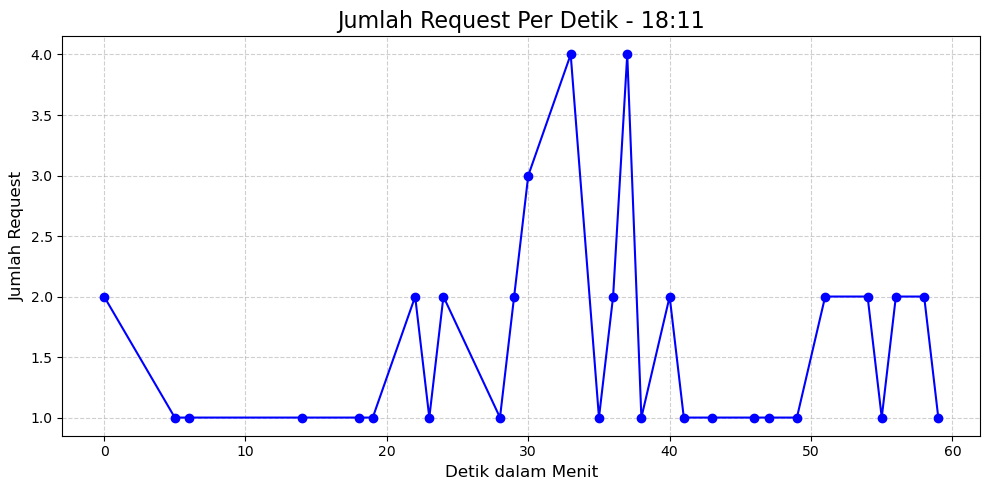

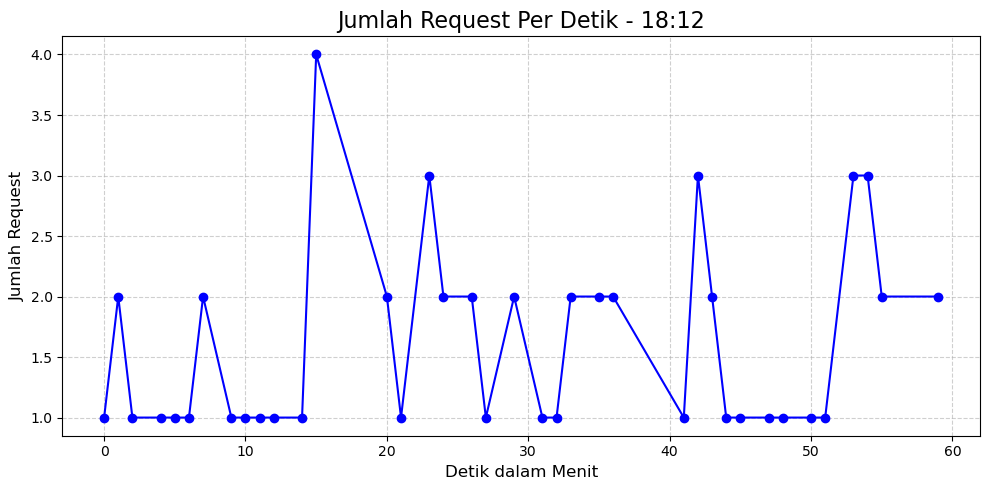

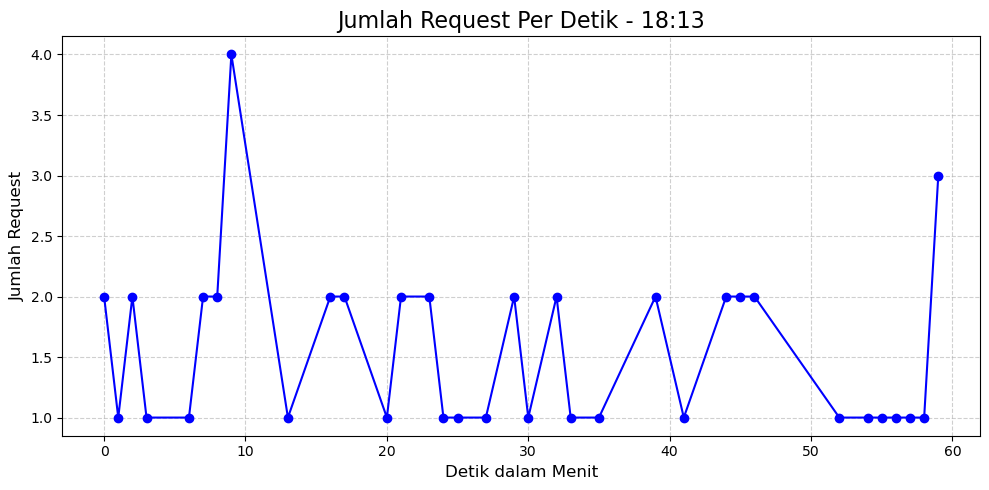

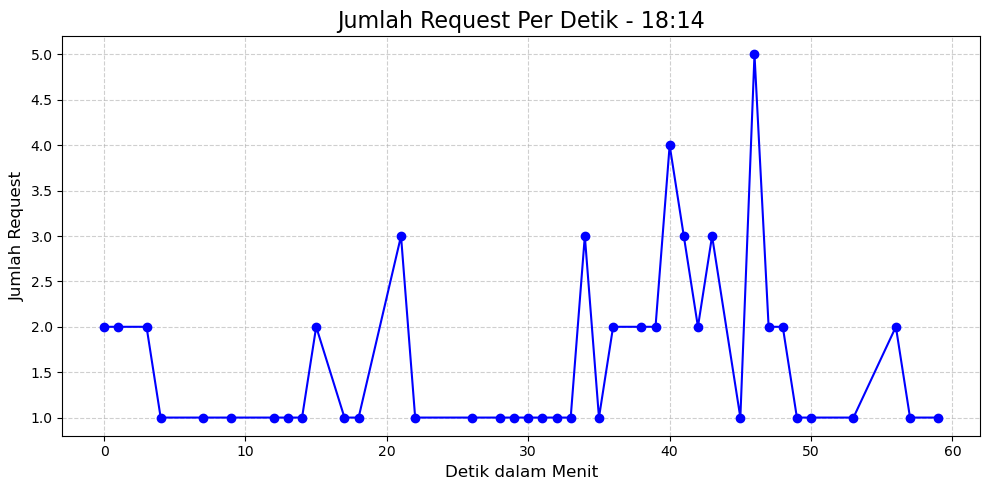

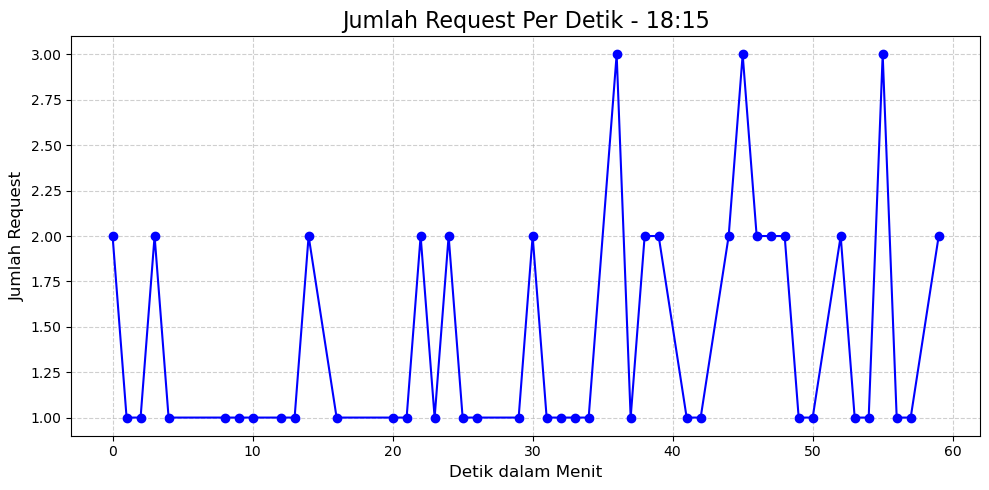

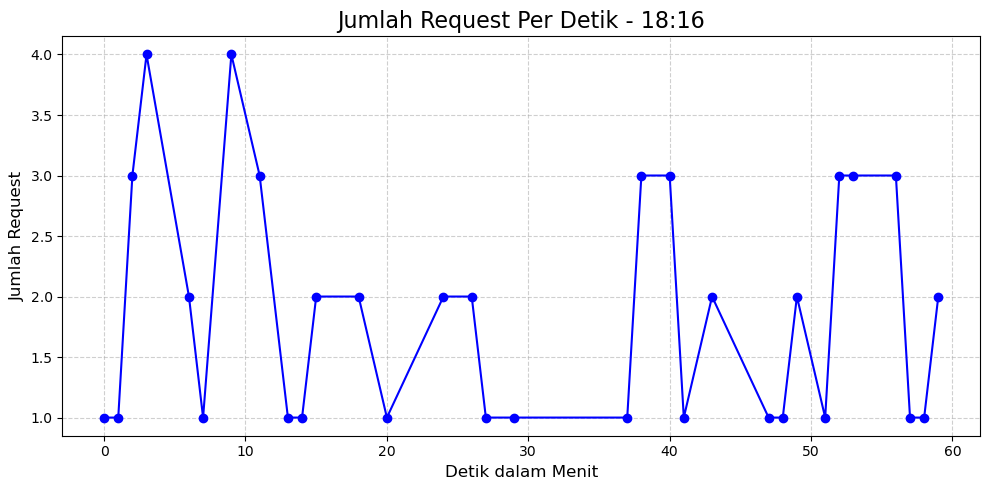

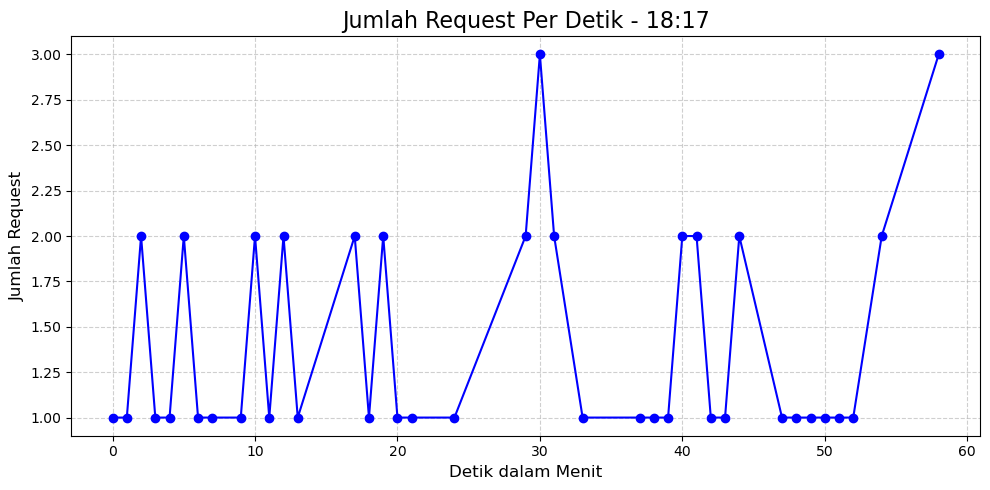

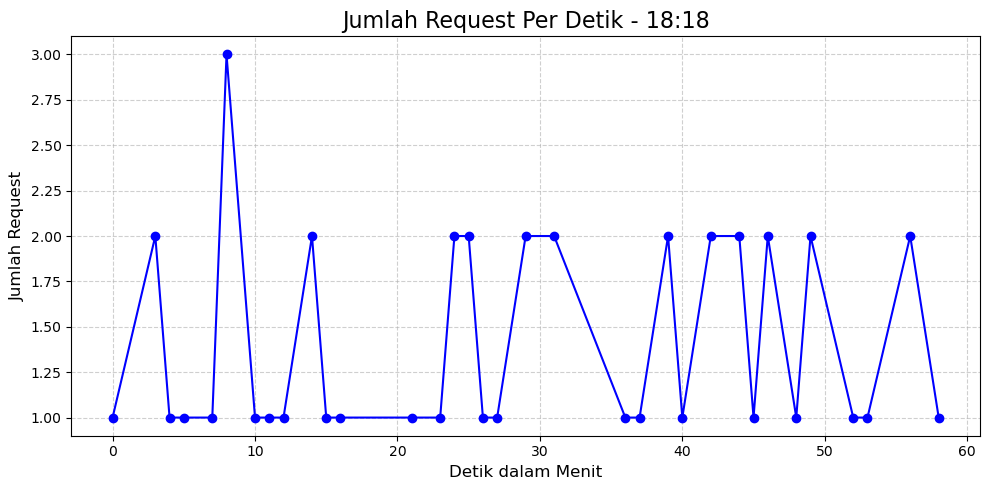

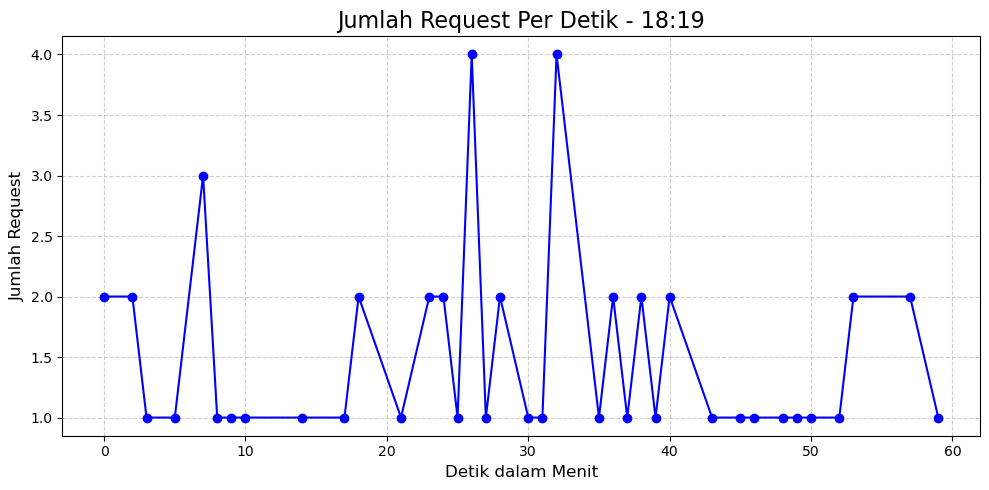

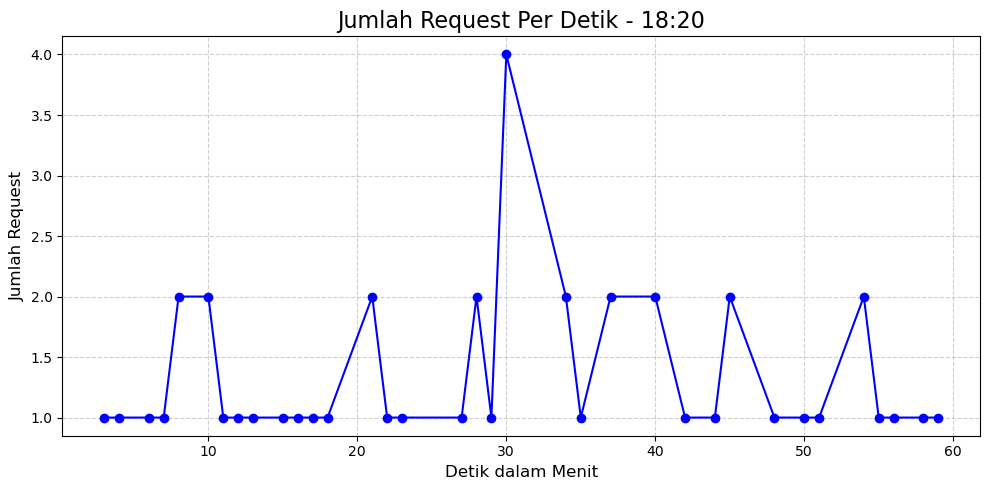

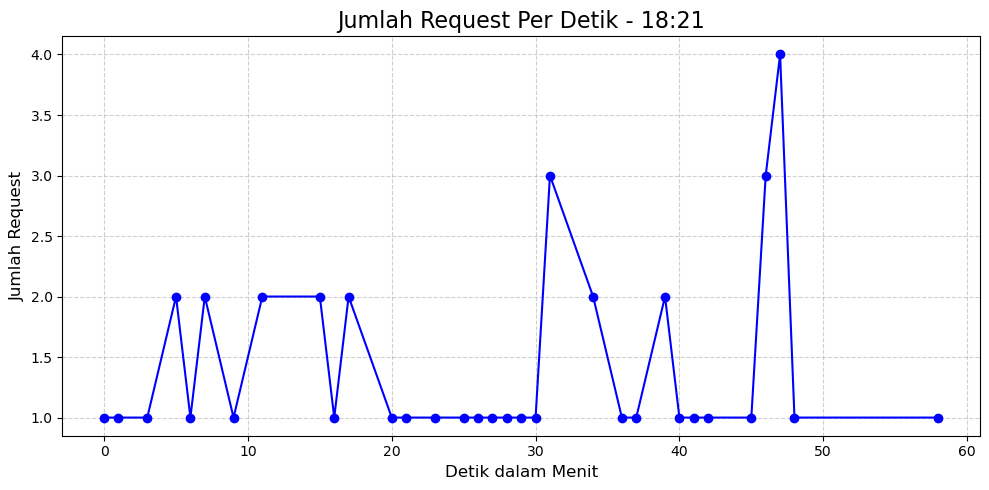

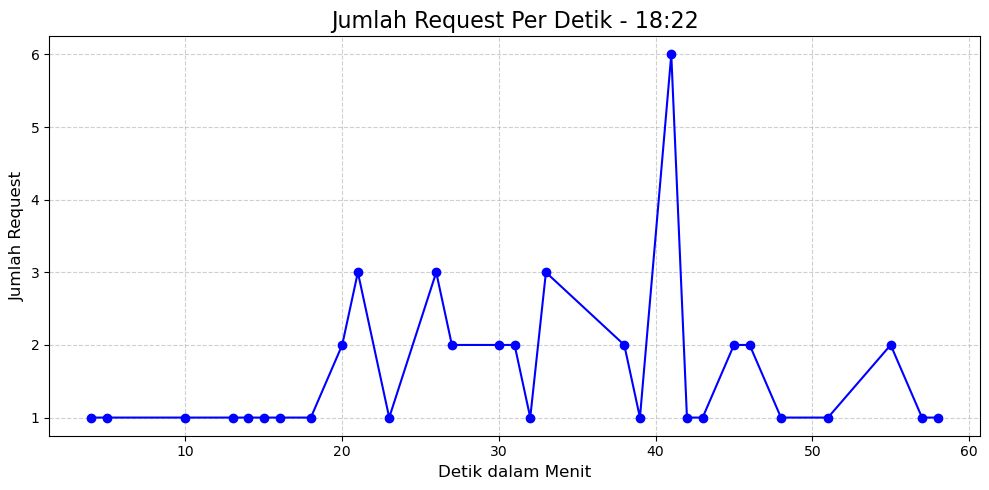

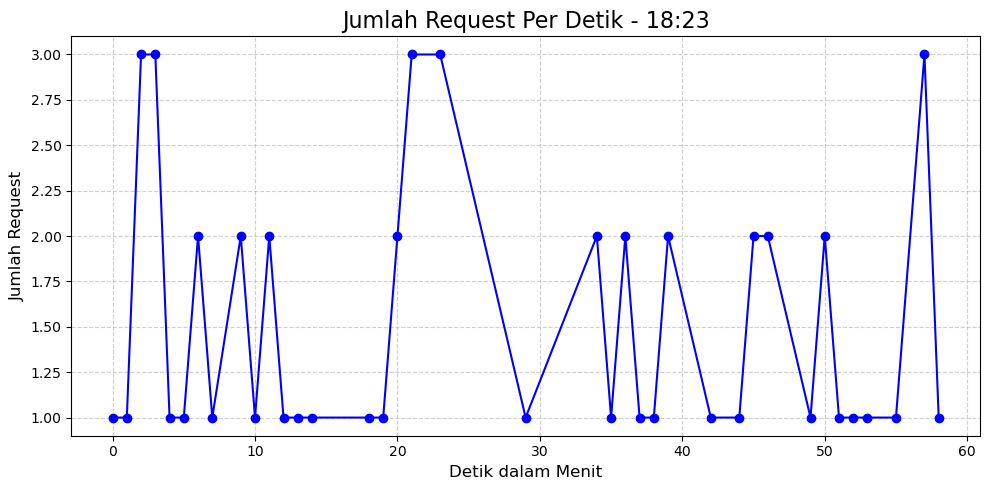

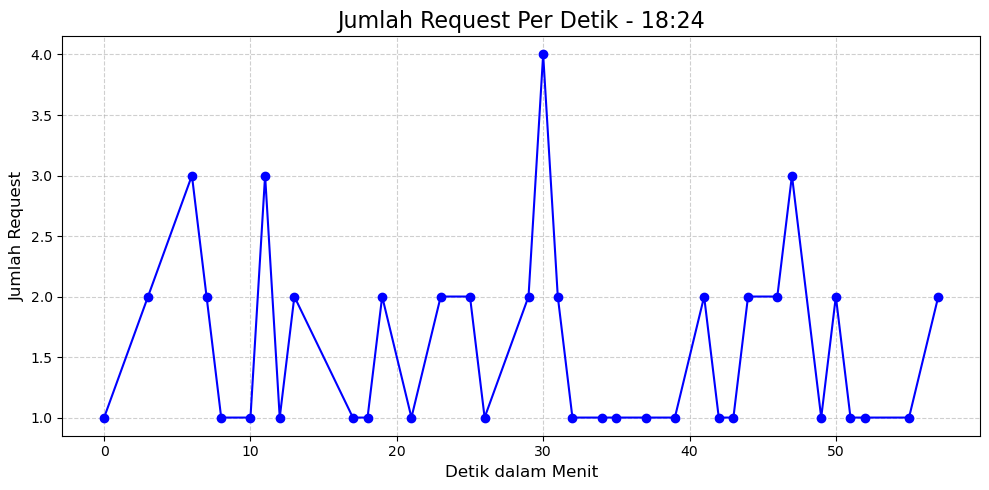

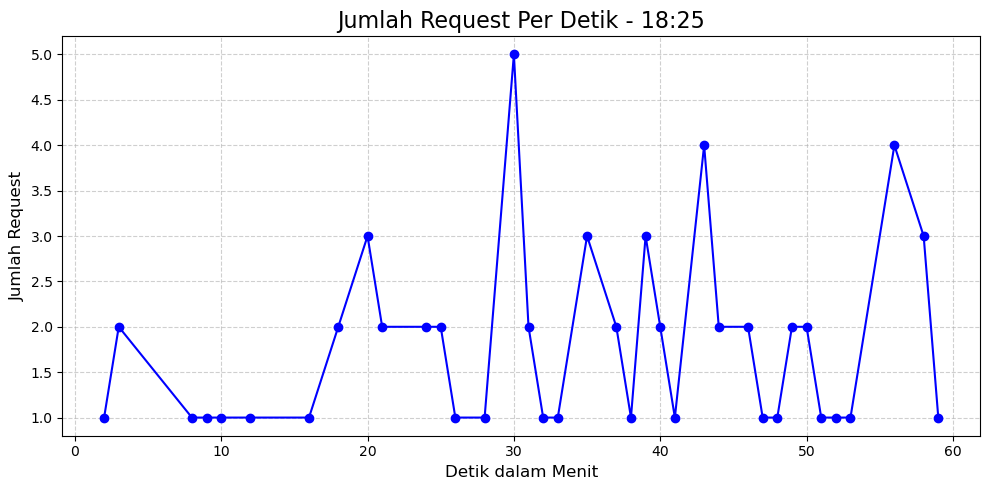

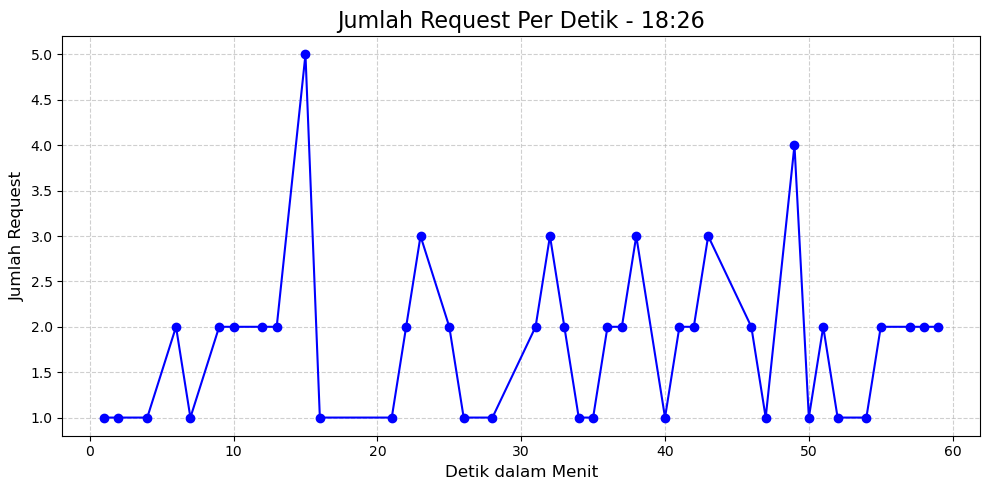

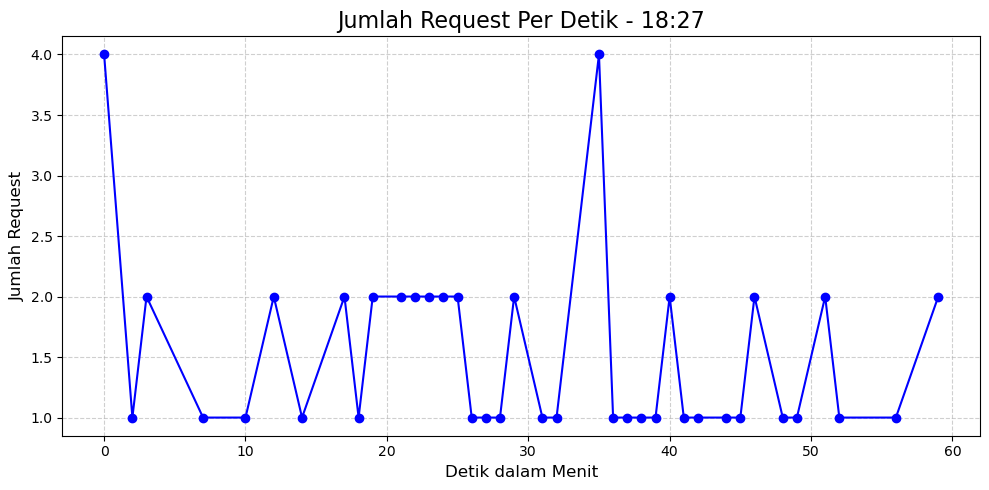

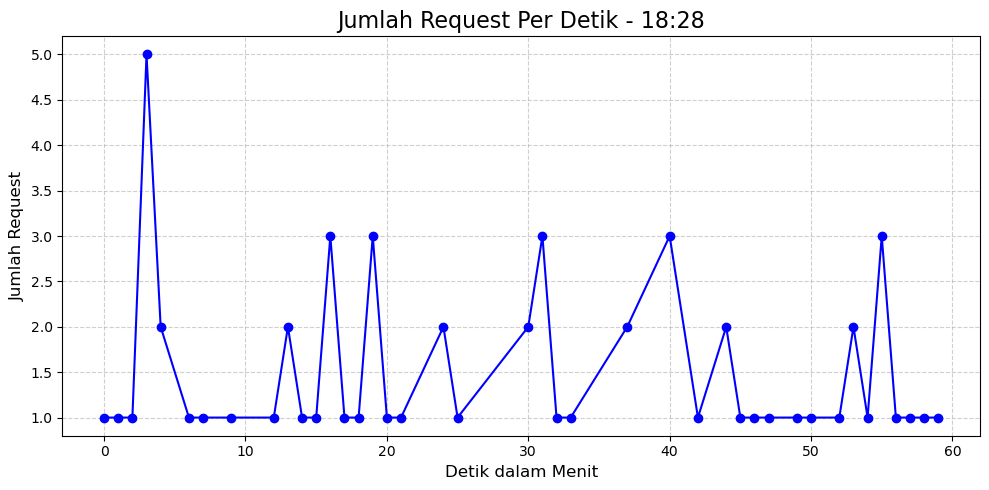

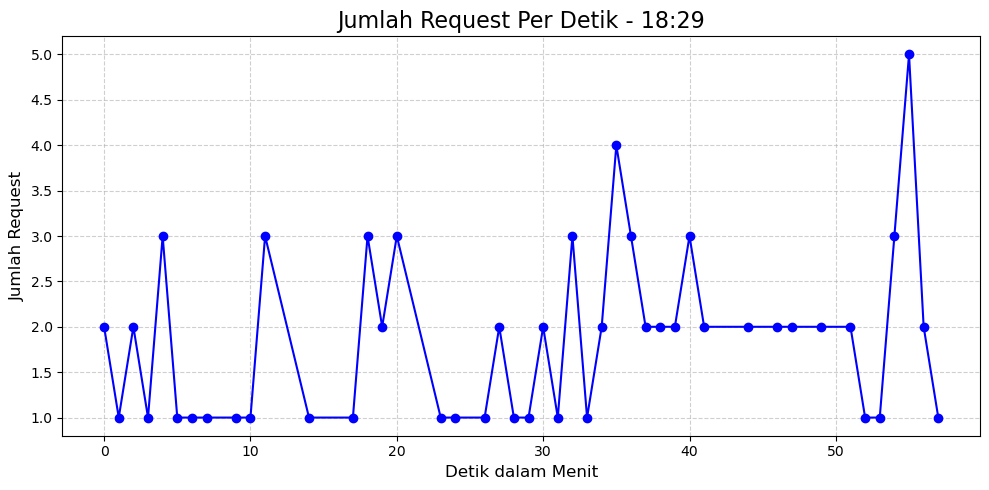

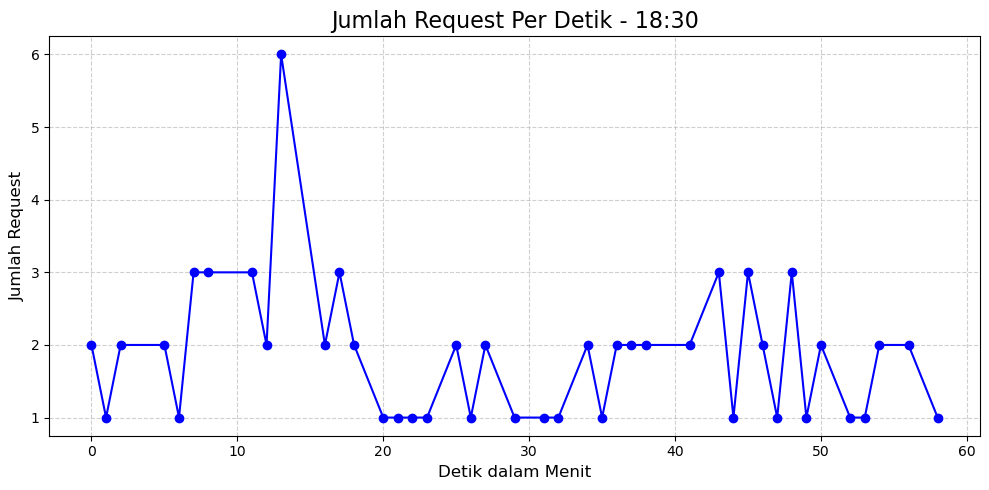

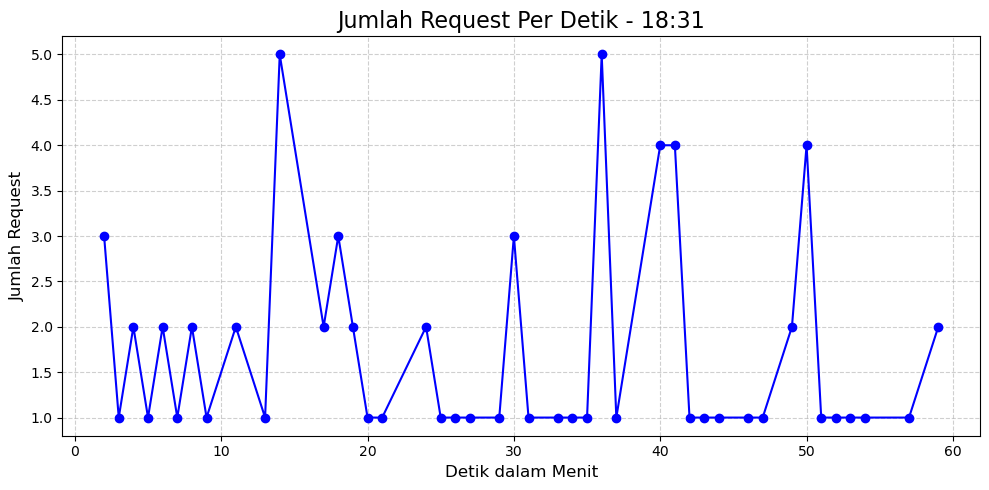

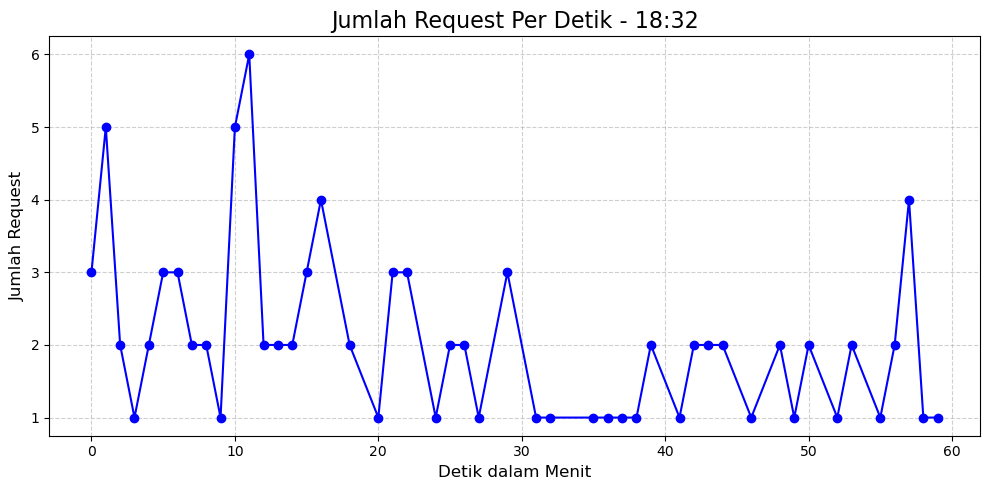

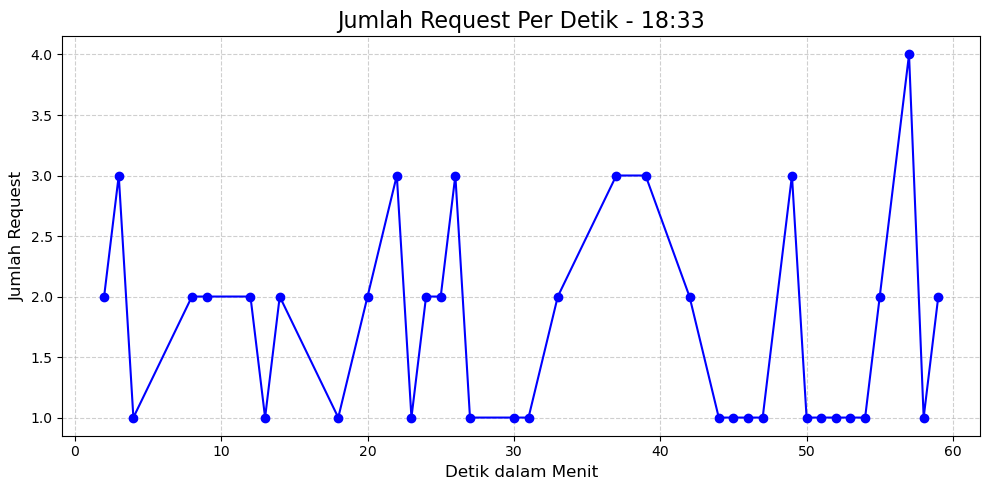

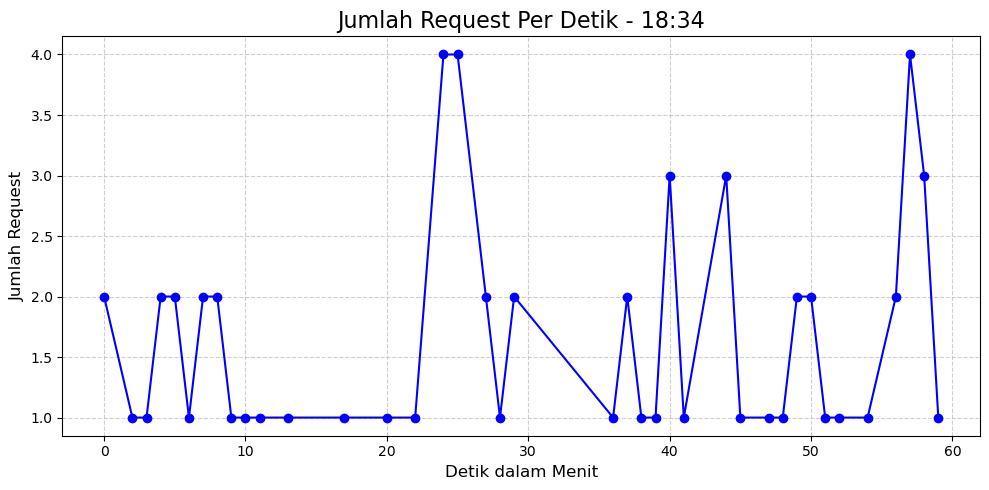

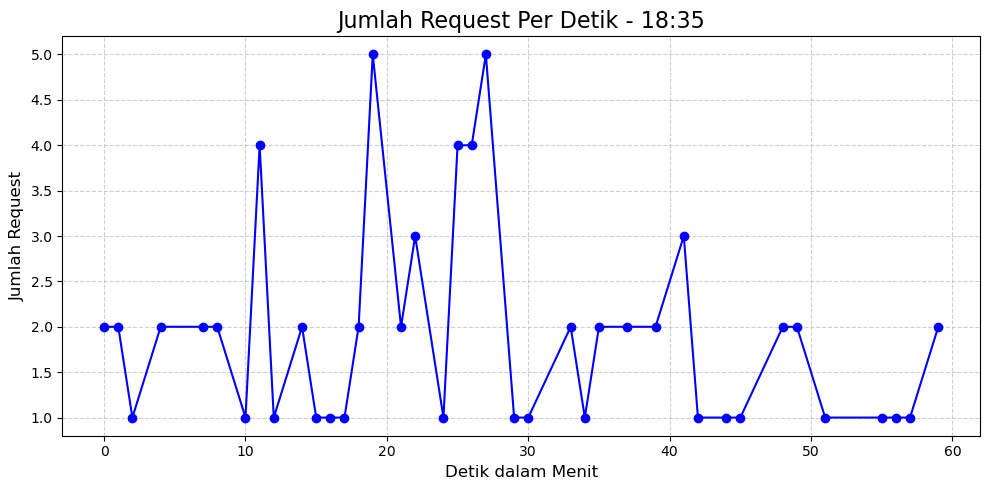

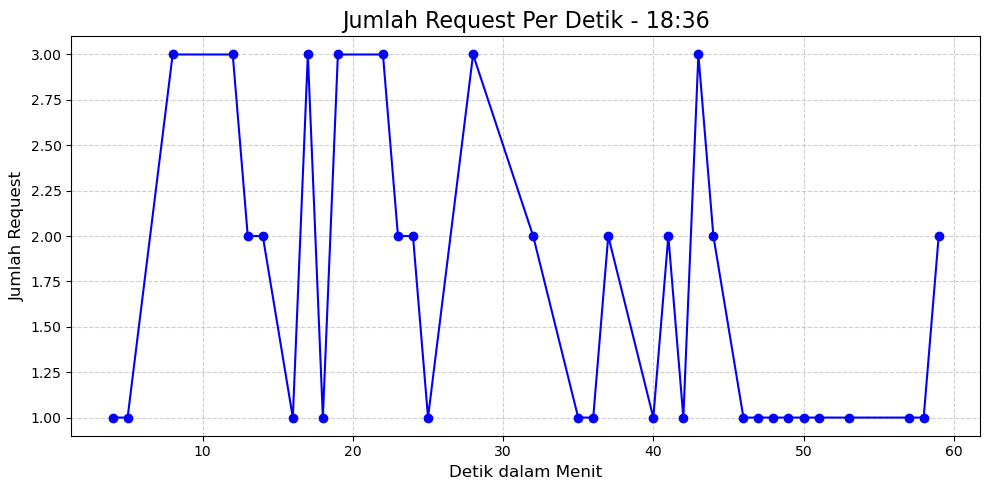

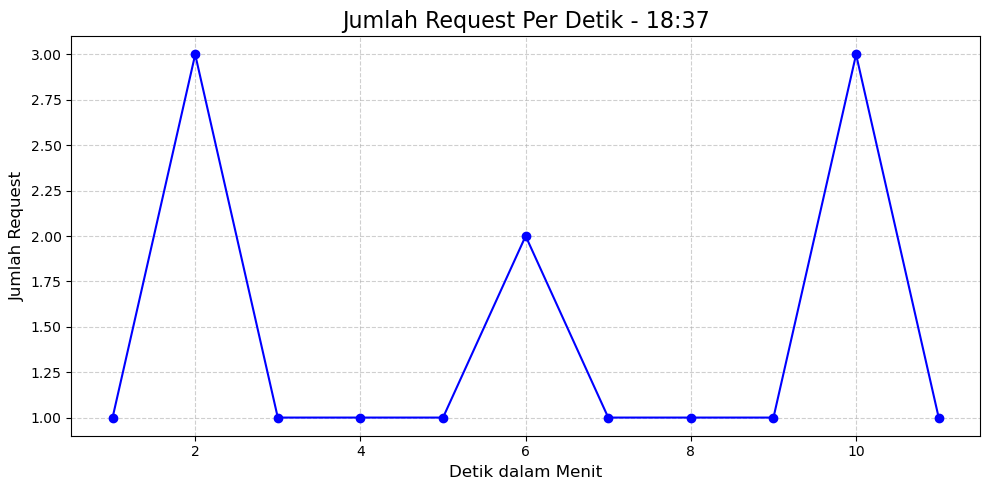

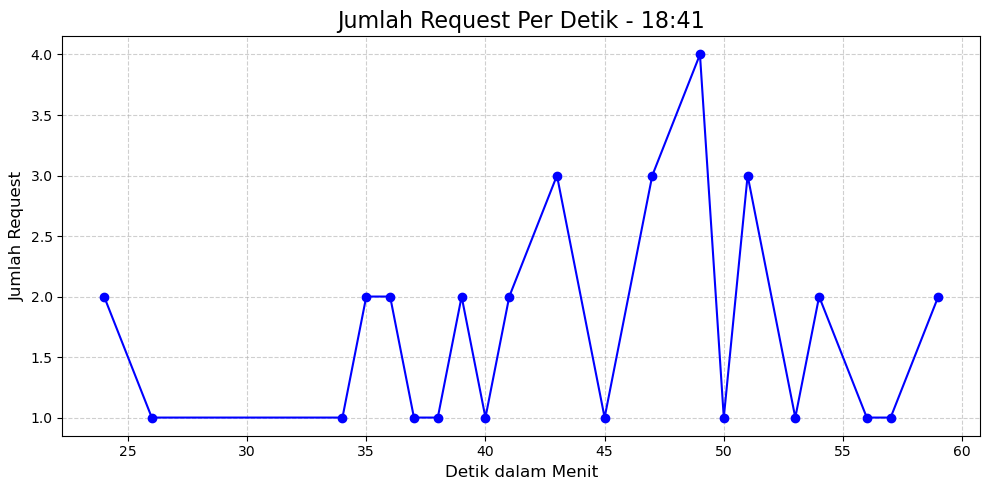

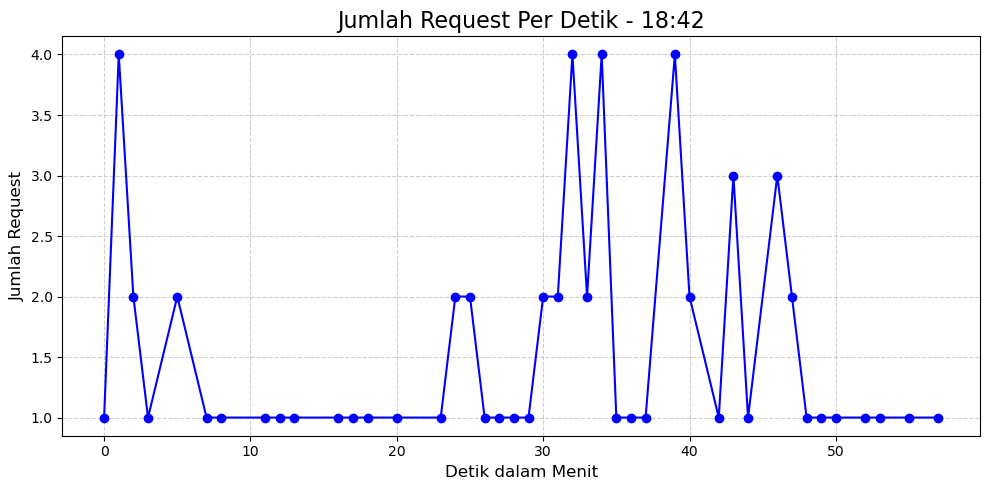

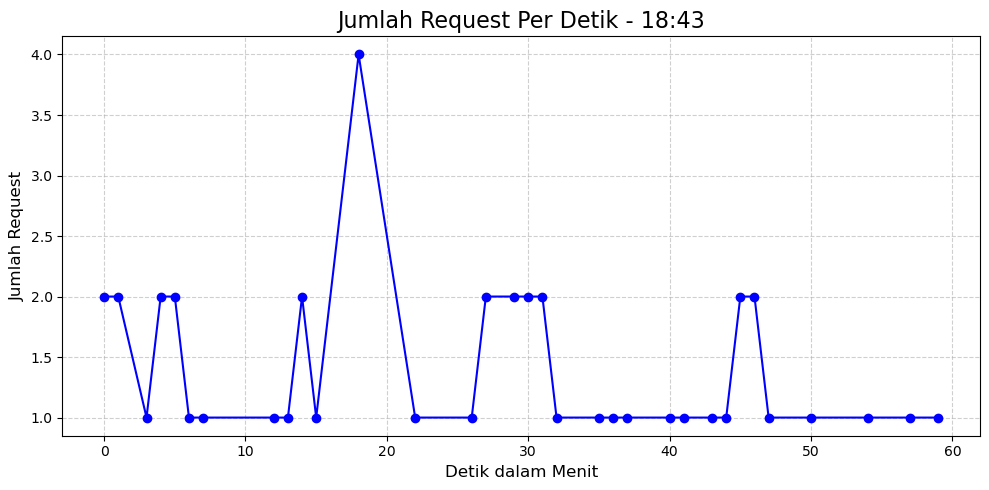

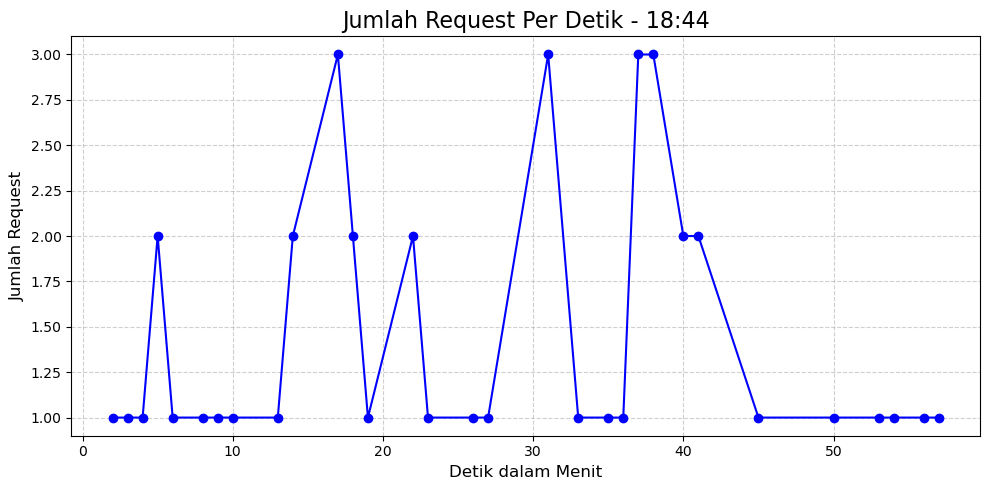

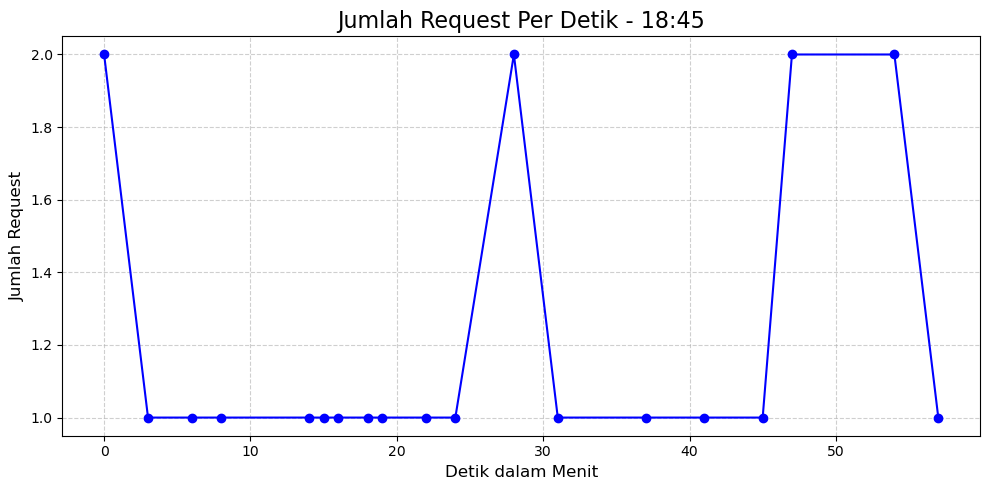

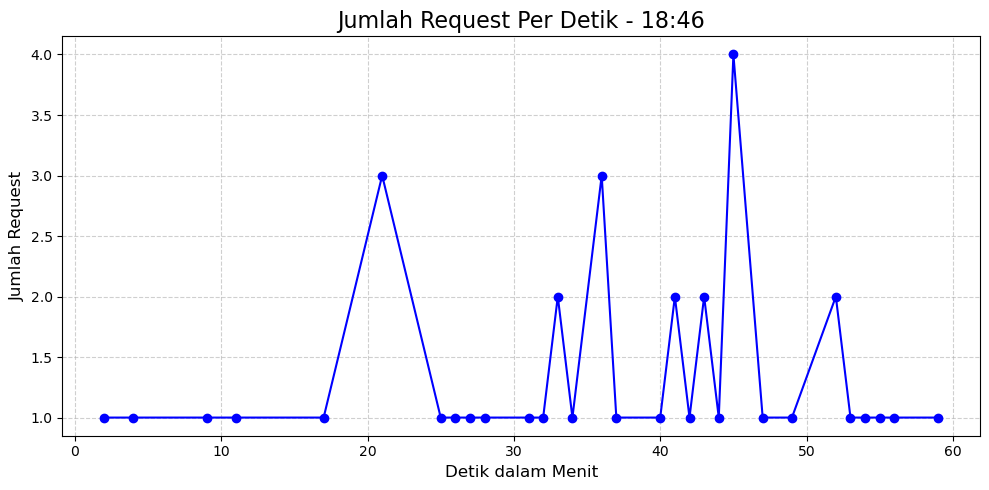

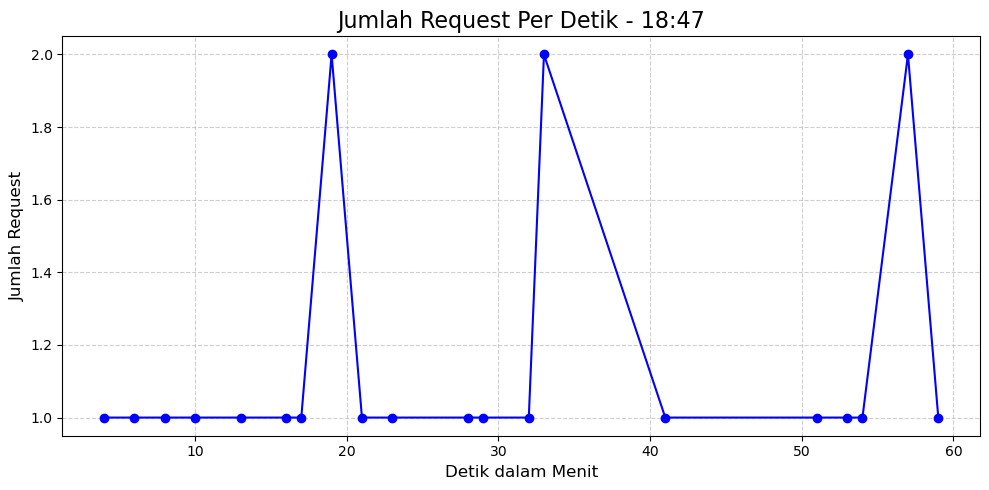

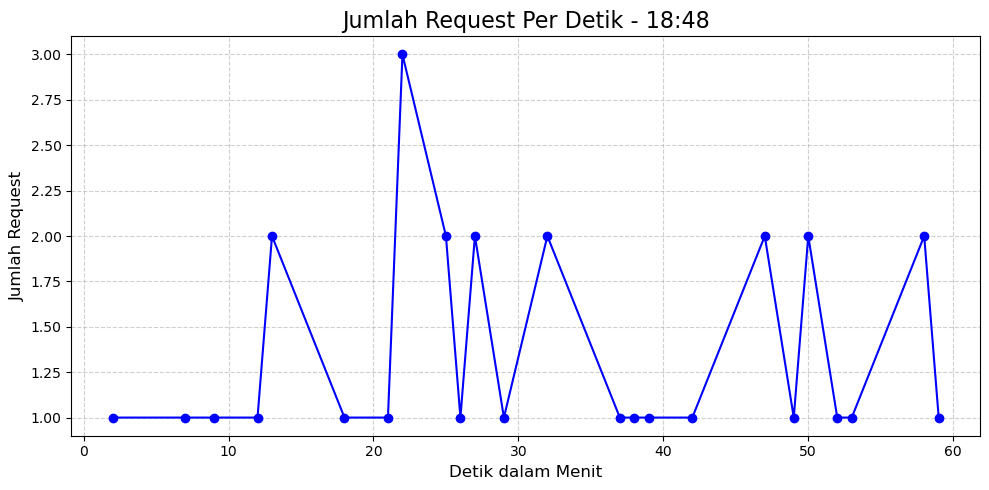

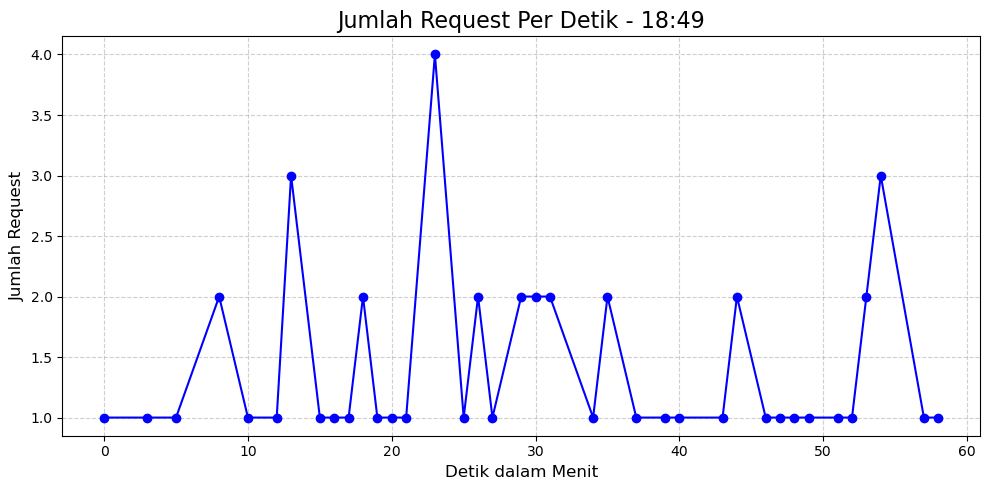

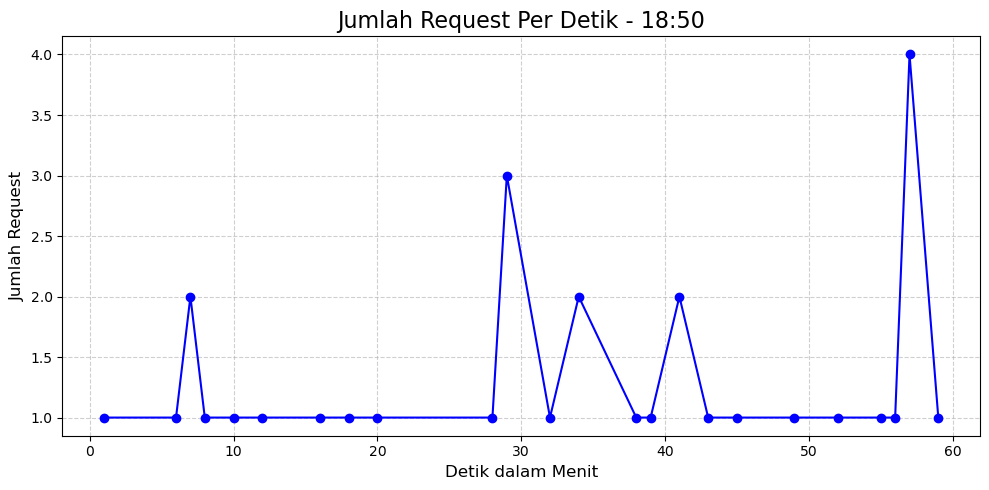

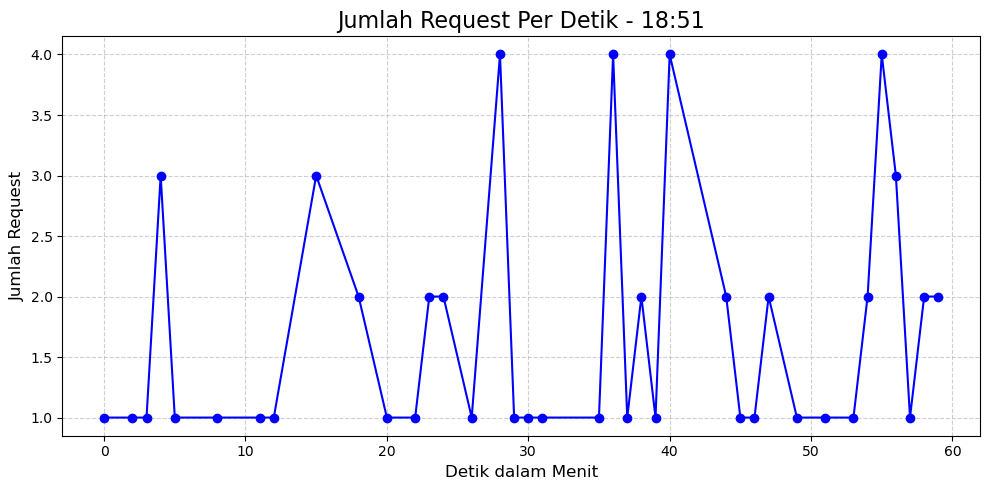

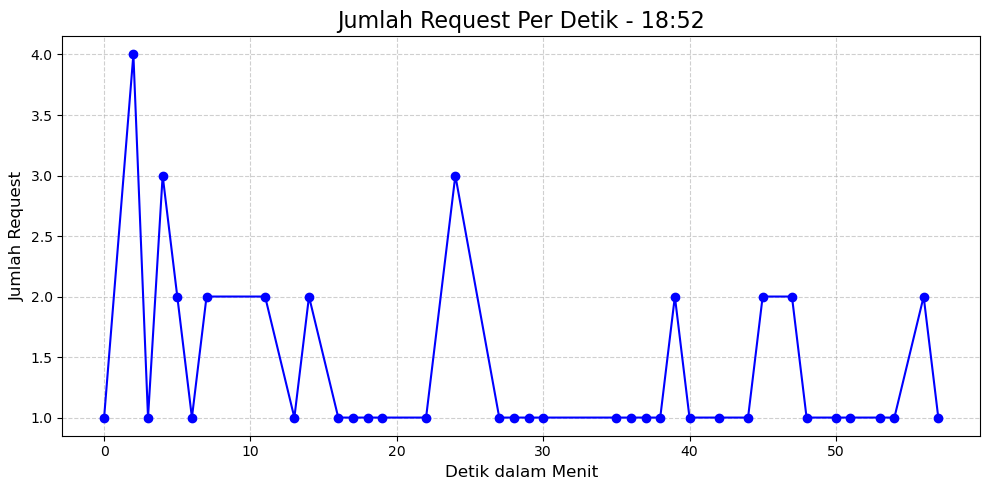

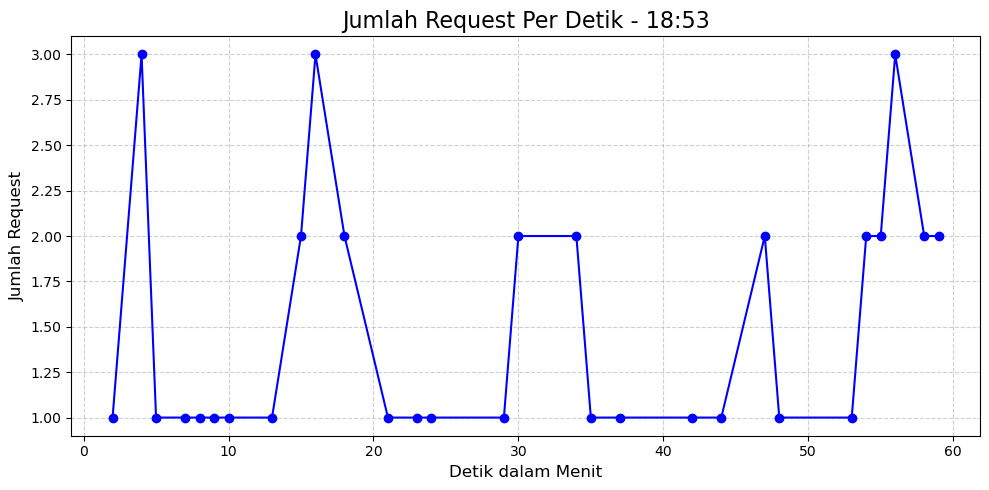

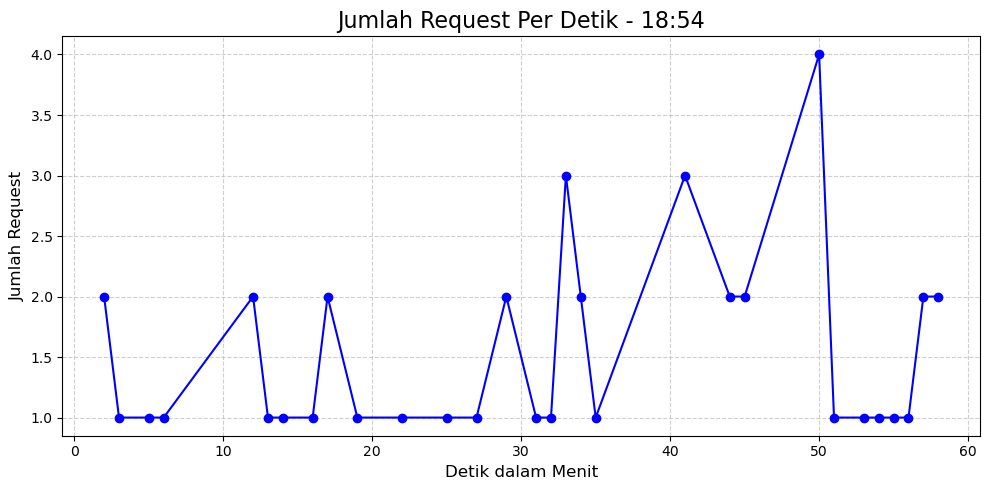

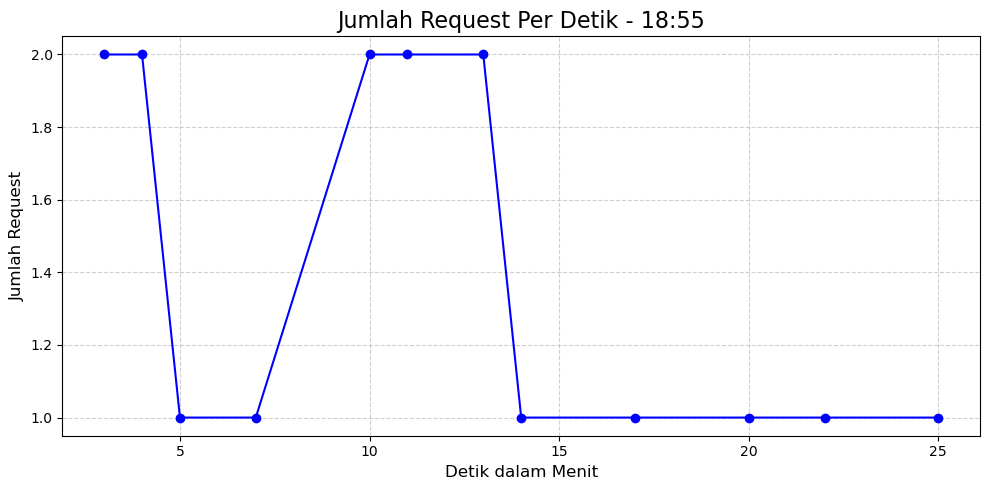

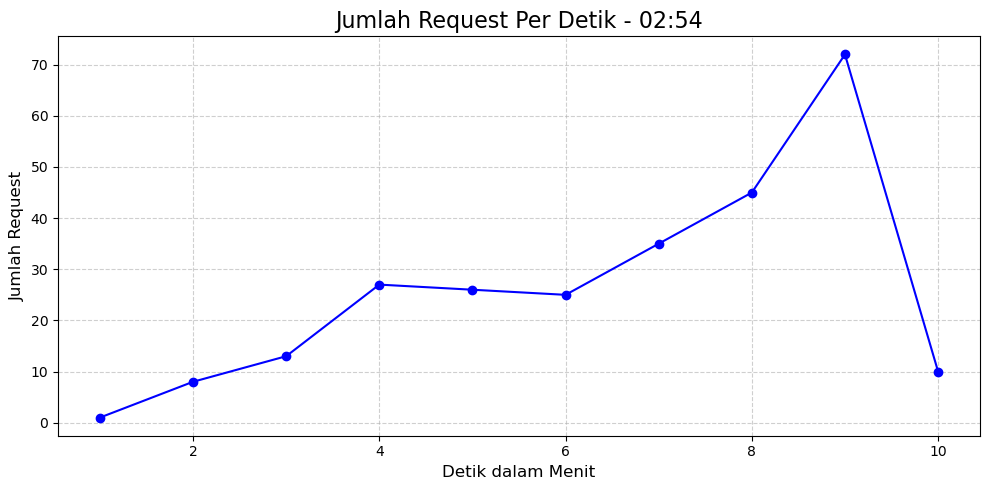

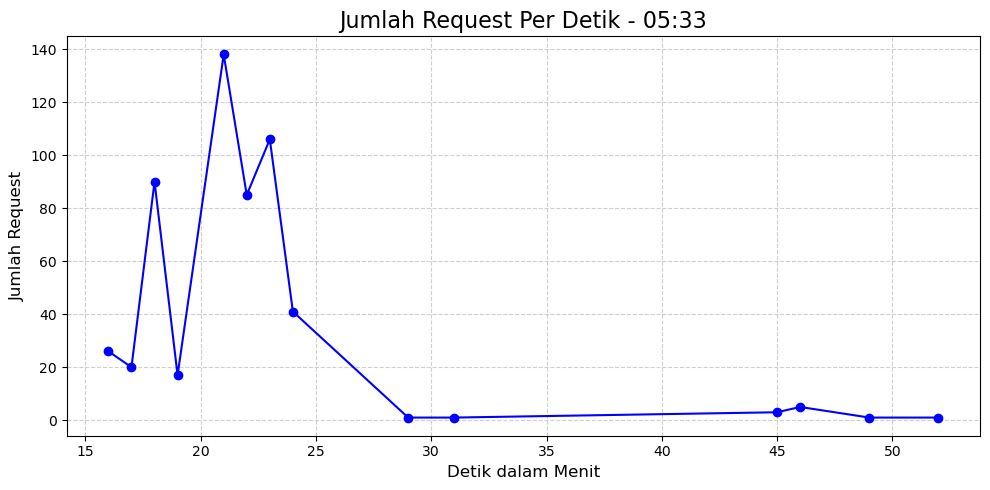

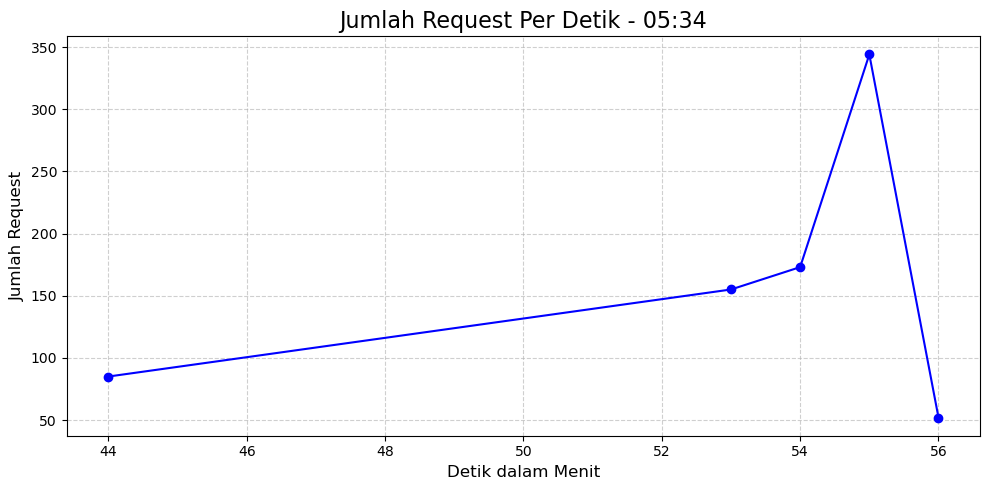

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file log
df = pd.read_csv('request_log_http.log', sep='\t', on_bad_lines='skip')

# Mengubah kolom 'Start Time' menjadi format datetime dan menangani nilai tidak valid
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df = df.dropna(subset=['Start Time'])  # Hapus baris dengan nilai tidak valid

# Membulatkan waktu ke detik dan menit
df['Start Time (Rounded)'] = df['Start Time'].dt.floor('S')  # Membulatkan ke detik
df['Start Time (Minute)'] = df['Start Time'].dt.floor('T')  # Membulatkan ke menit

# Mengelompokkan data berdasarkan menit
minutes = df['Start Time (Minute)'].unique()  # Daftar menit unik

# Membuat plot terpisah untuk setiap menit
for minute in minutes:
    # Filter data untuk menit tertentu
    data_per_minute = df[df['Start Time (Minute)'] == minute]
    
    # Hitung jumlah request per detik dalam menit tersebut
    grouped_per_second = data_per_minute.groupby('Start Time (Rounded)').size().reset_index(name='Request Count')
    
    # Membuat plot
    plt.figure(figsize=(10, 5))
    plt.plot(
        grouped_per_second['Start Time (Rounded)'].dt.second,  # Detik dalam menit
        grouped_per_second['Request Count'],
        marker='o',
        linestyle='-',
        color='blue'
    )
    
    # Menambahkan judul dan label
    plt.title(f'Jumlah Request Per Detik - {minute.strftime("%H:%M")}', fontsize=16)
    plt.xlabel('Detik dalam Menit', fontsize=12)
    plt.ylabel('Jumlah Request', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Menampilkan plot
    plt.tight_layout()
    plt.show()


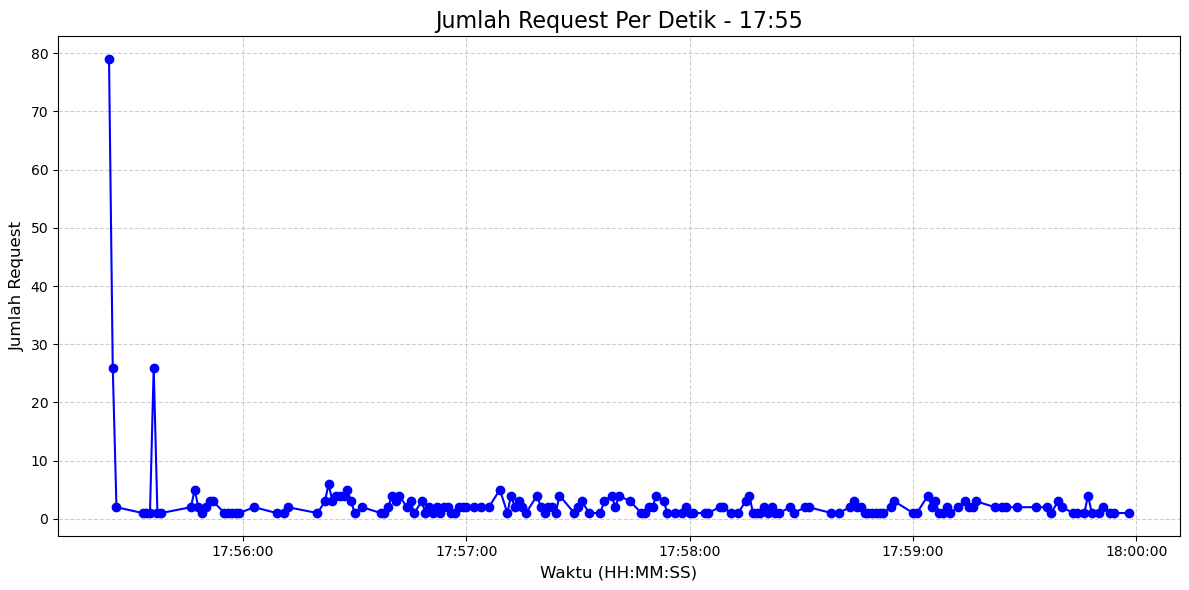

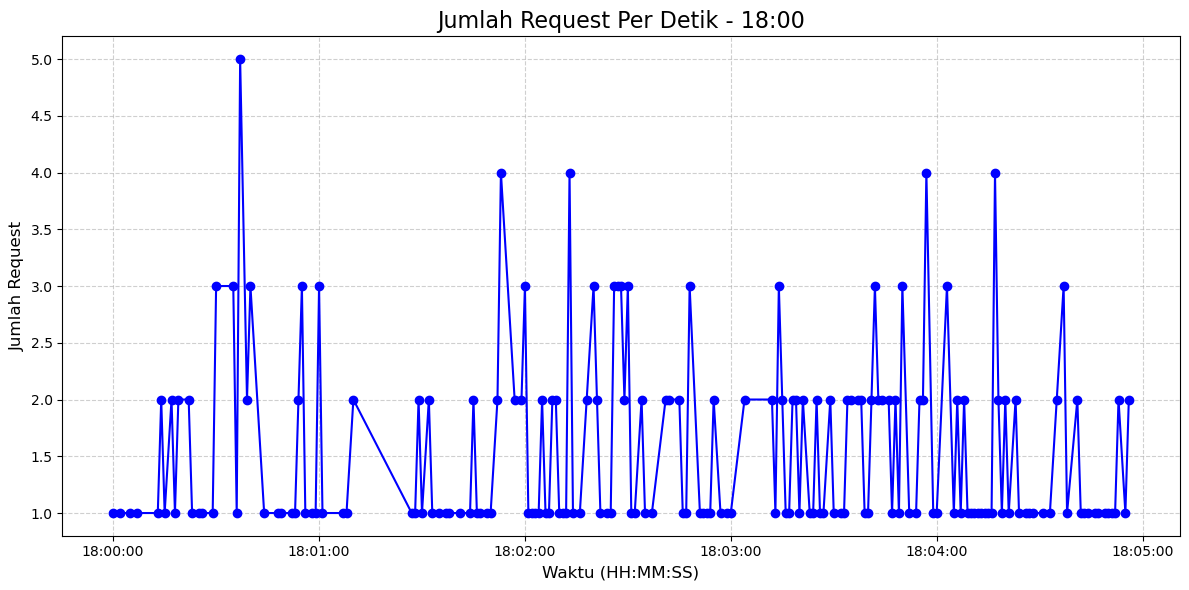

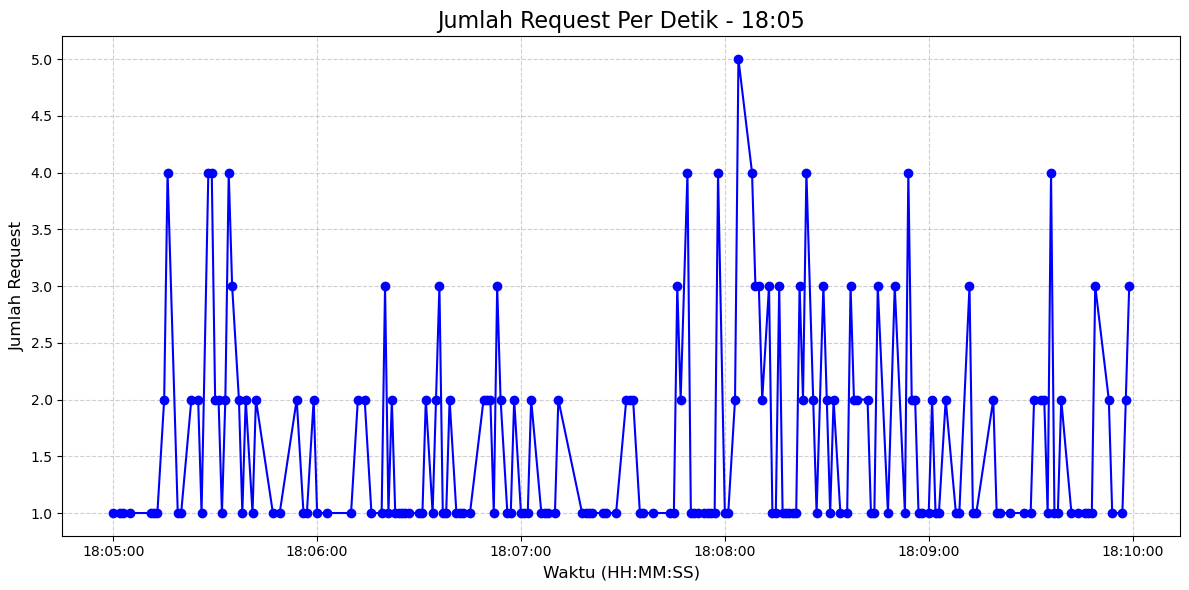

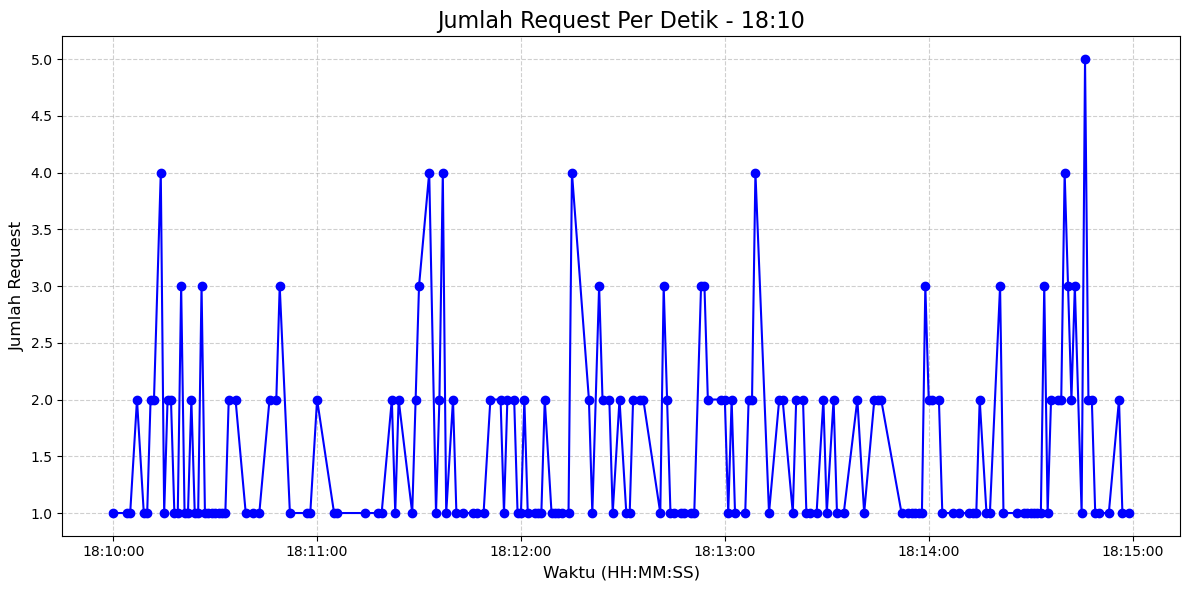

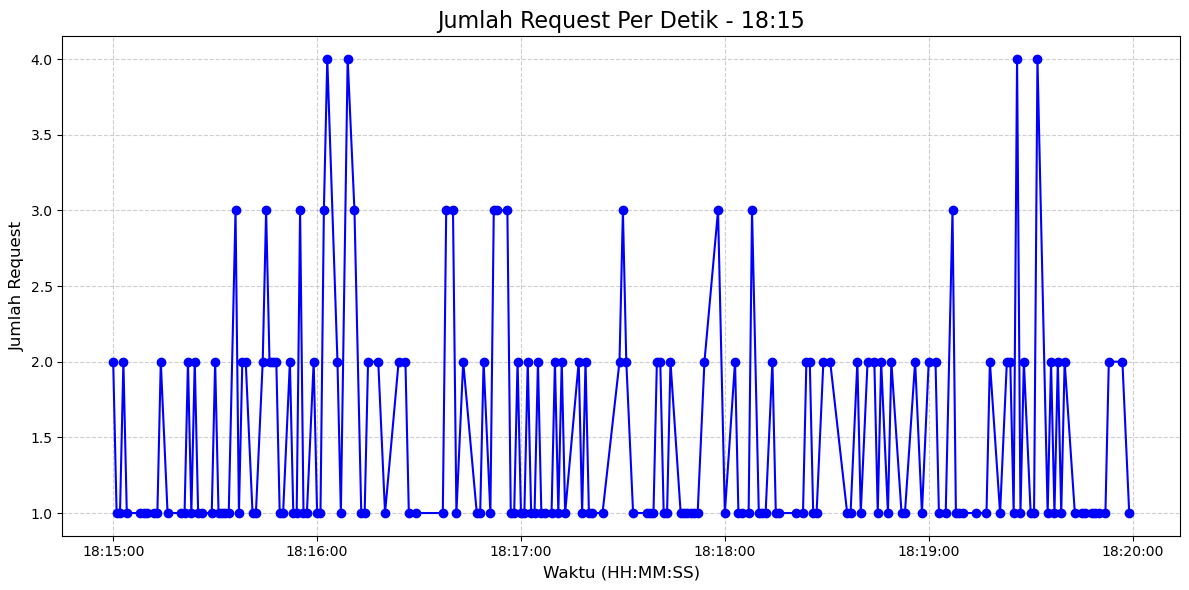

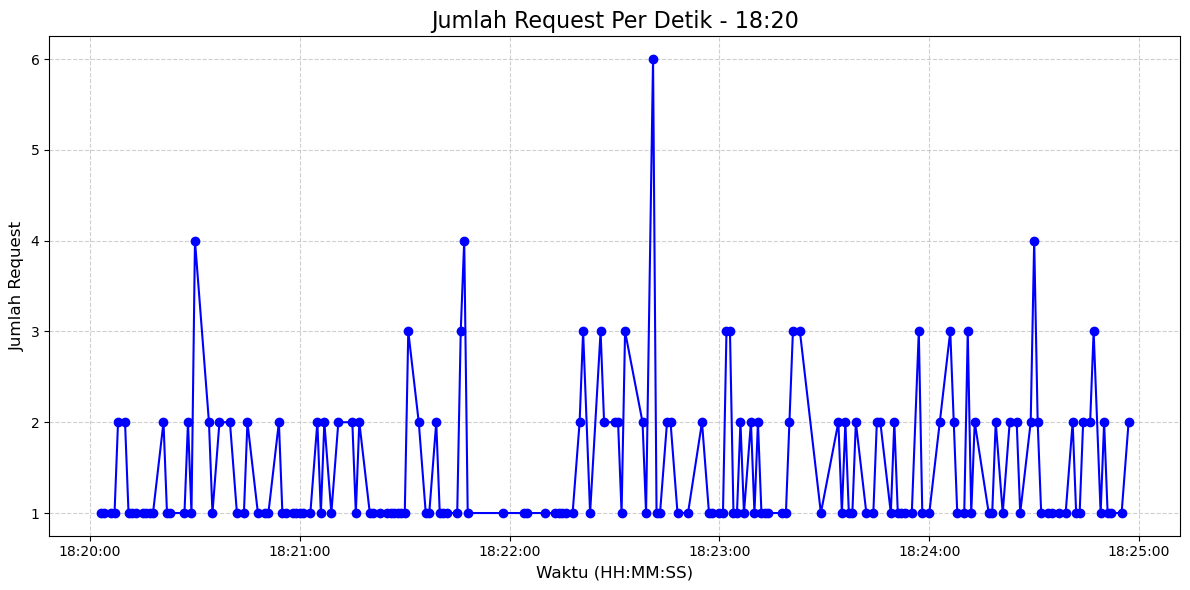

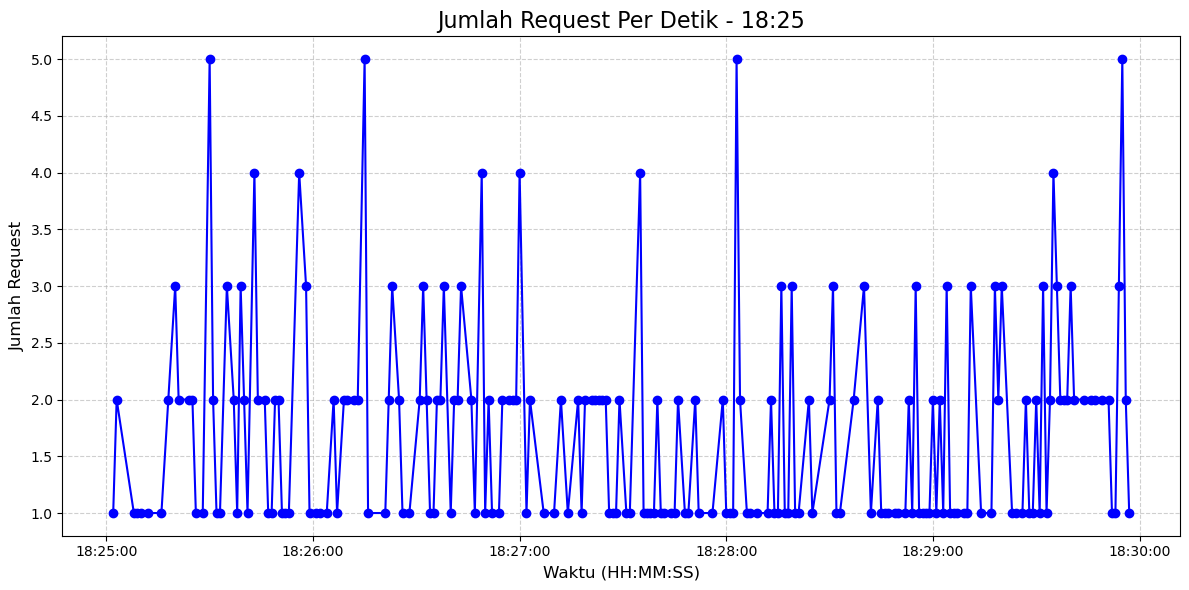

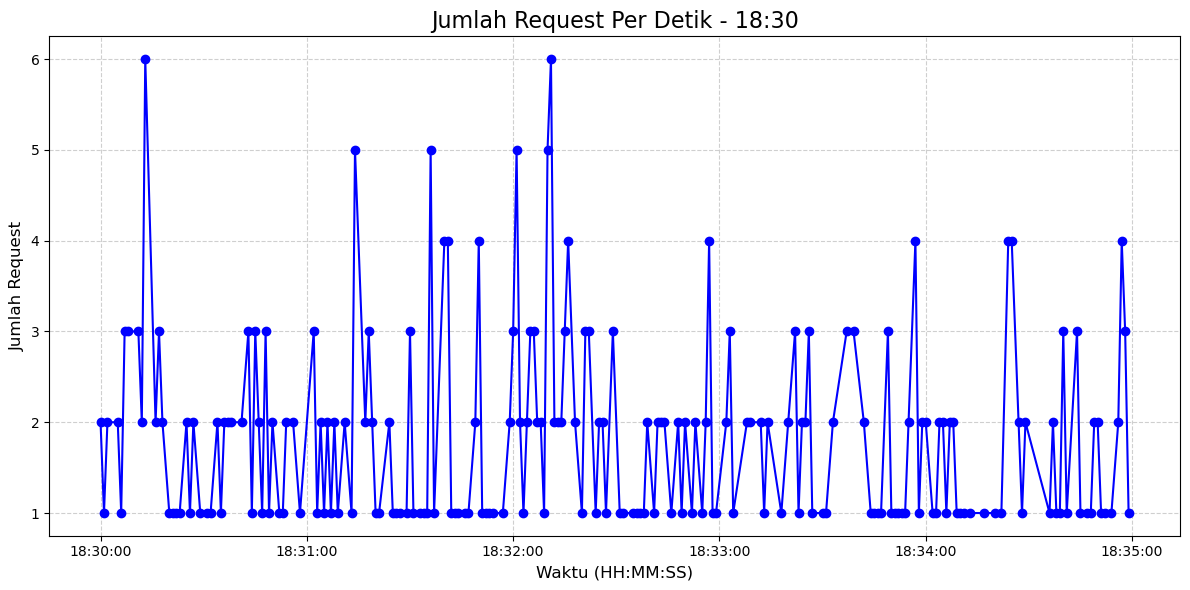

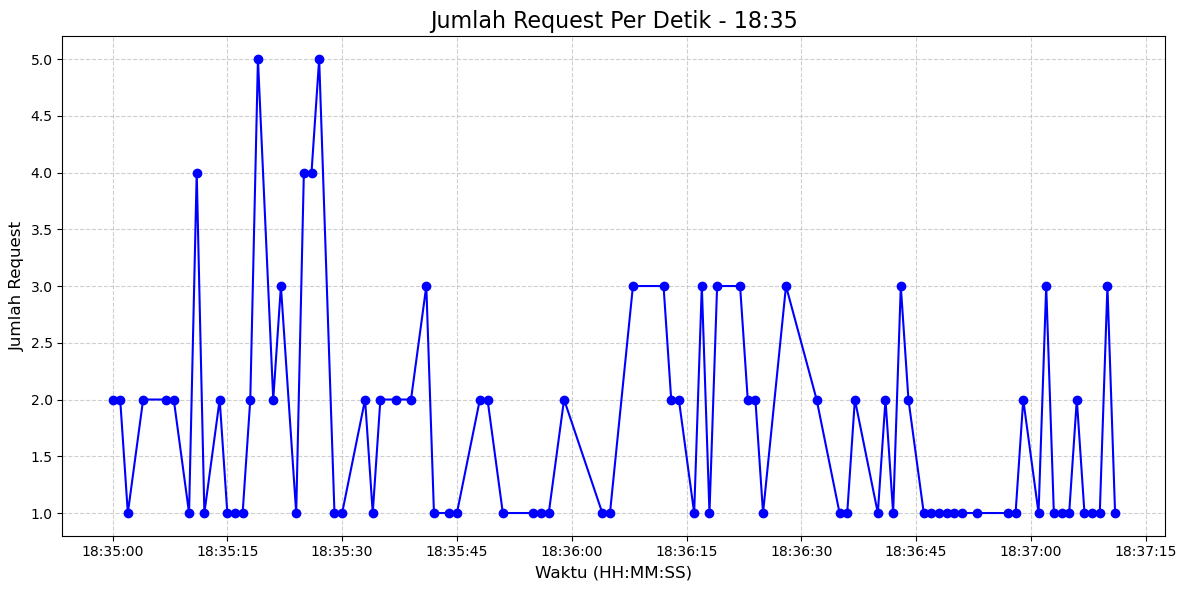

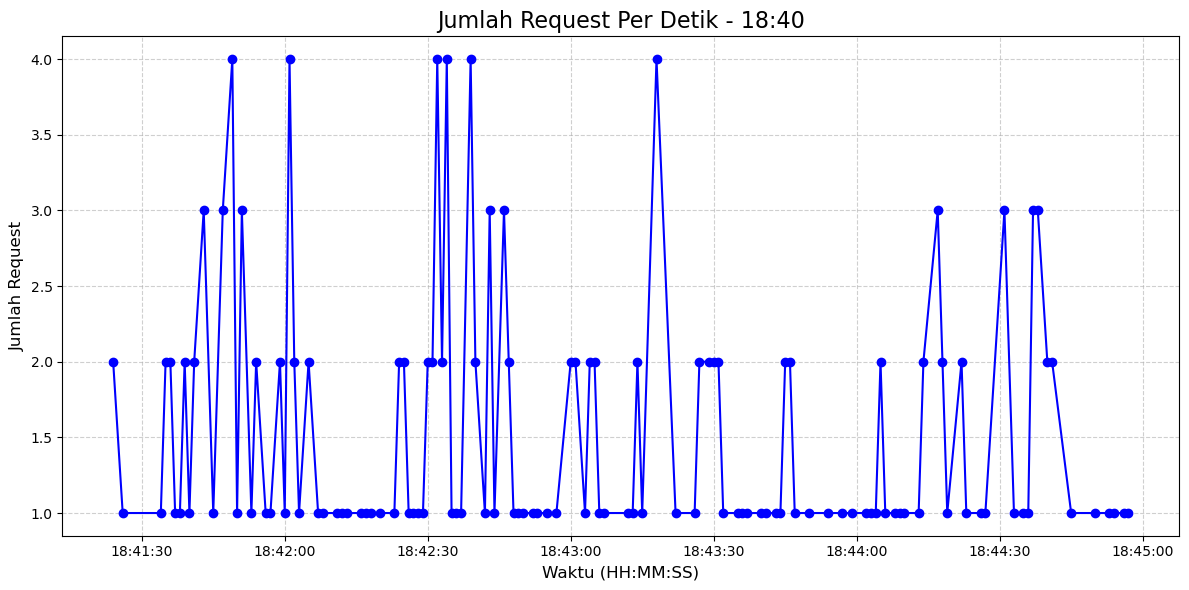

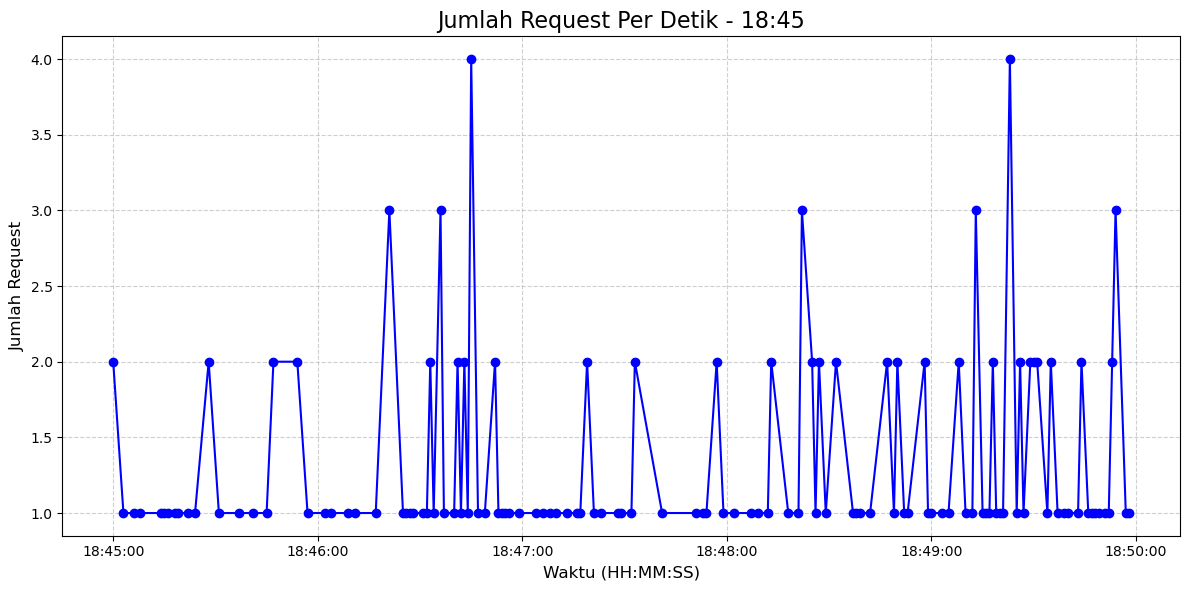

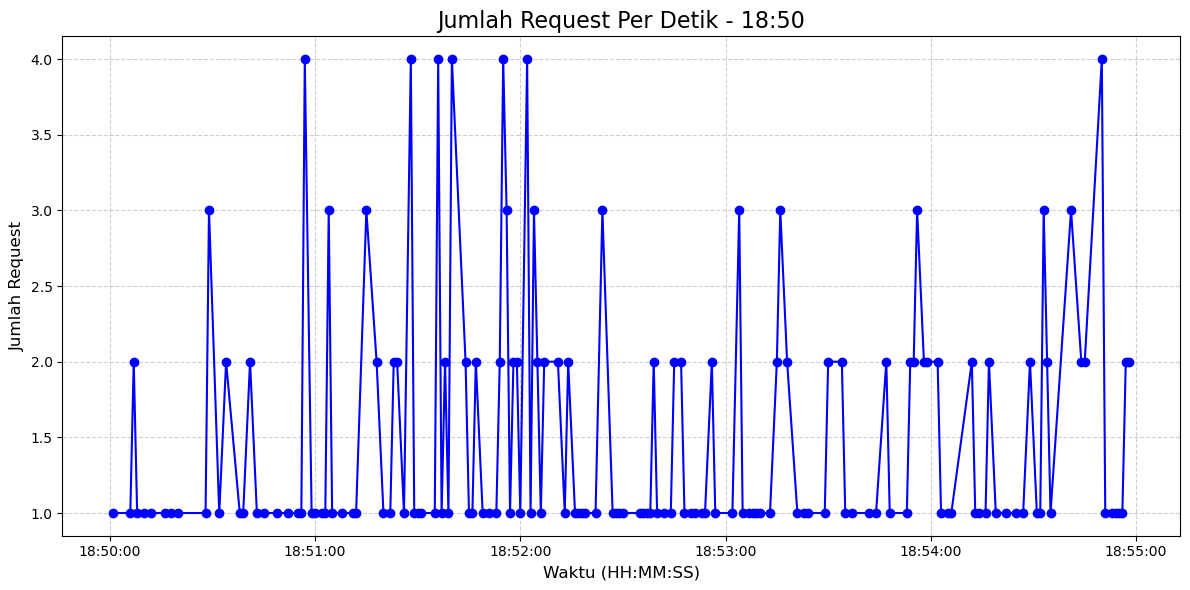

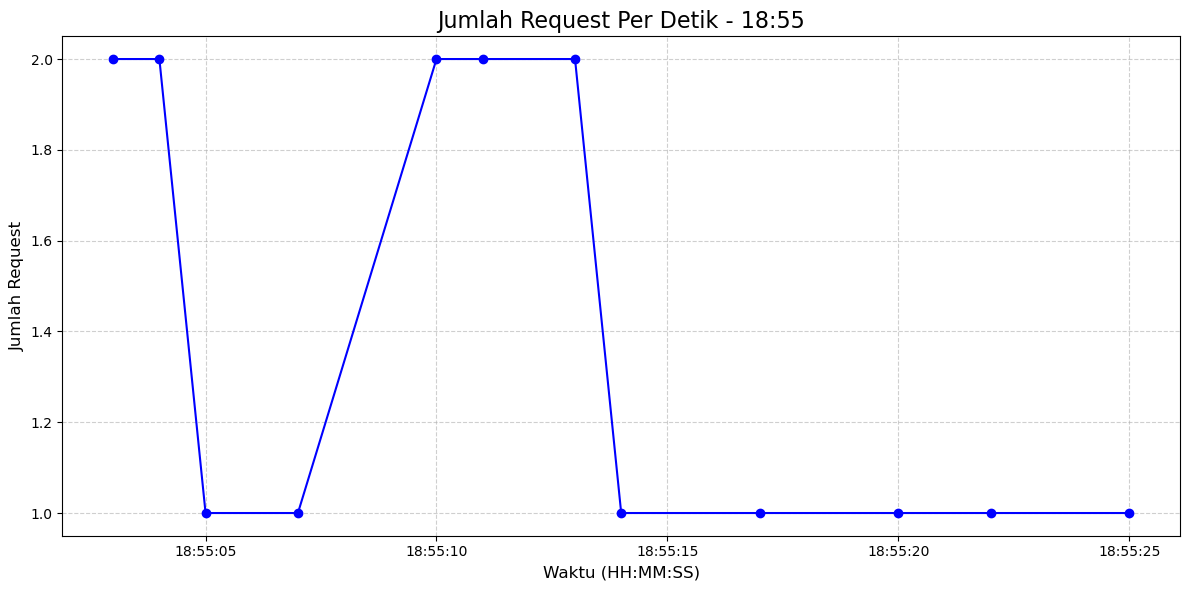

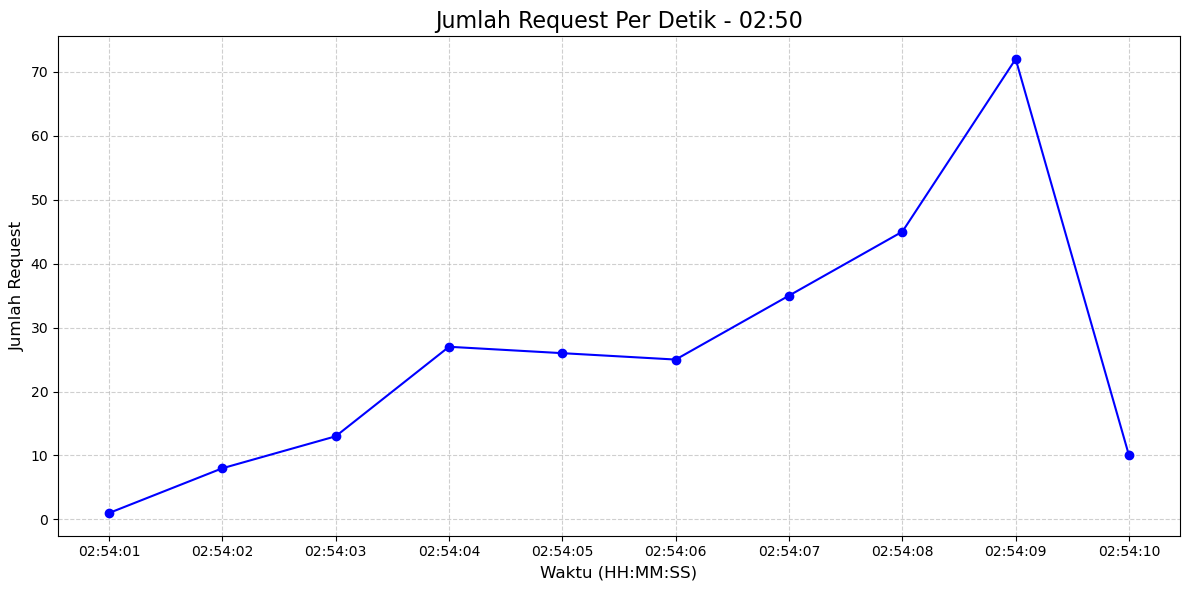

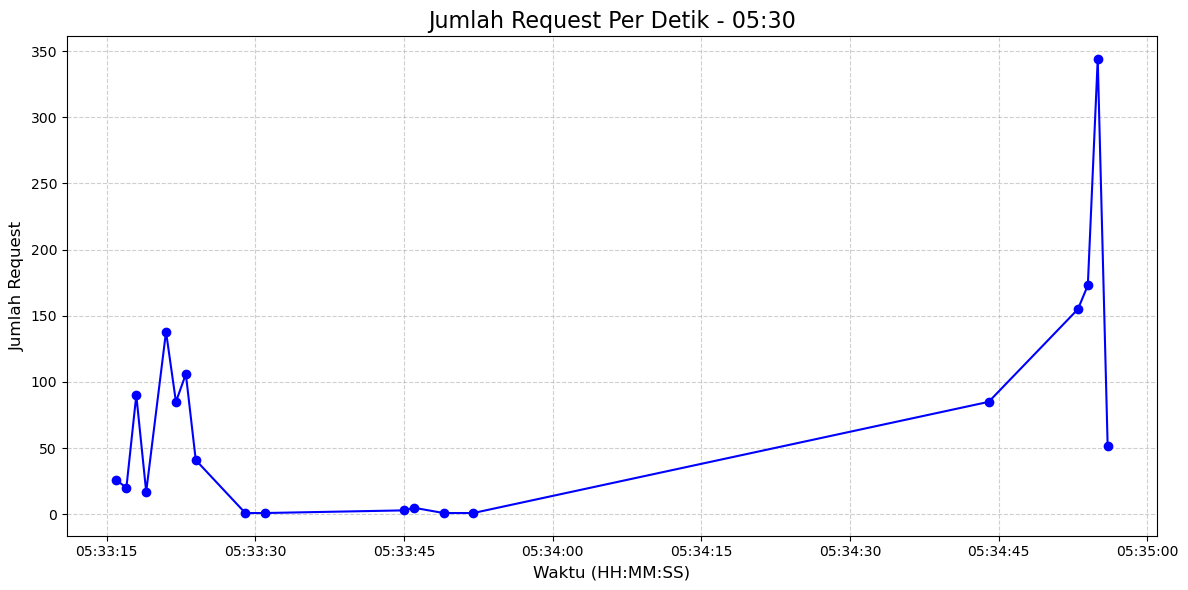

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file log dengan menangani baris yang bermasalah
df = pd.read_csv('request_log_http.log', sep='\t', on_bad_lines='skip')

# Mengubah kolom 'Start Time' menjadi format datetime dan menangani nilai tidak valid
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df = df.dropna(subset=['Start Time'])  # Hapus baris dengan nilai tidak valid

# Membulatkan waktu ke detik dan 5 menit
df['Start Time (Rounded)'] = df['Start Time'].dt.floor('S')  # Membulatkan ke detik
df['Start Time (5 Minute)'] = df['Start Time'].dt.floor('5T')  # Membulatkan ke setiap 5 menit

# Mengelompokkan data berdasarkan setiap 5 menit
five_minute_intervals = df['Start Time (5 Minute)'].unique()  # Daftar interval unik setiap 5 menit

# Membuat plot terpisah untuk setiap 5 menit
for interval in five_minute_intervals:
    # Filter data untuk interval 5 menit tertentu
    data_per_interval = df[df['Start Time (5 Minute)'] == interval]
    
    # Hitung jumlah request per detik dalam interval tersebut
    grouped_per_second = data_per_interval.groupby('Start Time (Rounded)').size().reset_index(name='Request Count')
    
    # Membuat plot
    plt.figure(figsize=(12, 6))
    plt.plot(
        grouped_per_second['Start Time (Rounded)'],  # Tetap gunakan datetime di sumbu X
        grouped_per_second['Request Count'],
        marker='o',
        linestyle='-',
        color='blue'
    )
    
    # Format sumbu X untuk menampilkan waktu saja (tanpa tanggal)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))
    
    # Menambahkan judul dan label
    plt.title(f'Jumlah Request Per Detik - {interval.strftime("%H:%M")}', fontsize=16)
    plt.xlabel('Waktu (HH:MM:SS)', fontsize=12)
    plt.ylabel('Jumlah Request', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Menampilkan plot
    plt.tight_layout()
    plt.show()


In [19]:
df.head(10)

URL                 Start Time  \
0       www.reuters.com 2024-12-27 17:55:24.776462   
1       www.reuters.com 2024-12-27 17:55:24.723688   
2       www.reuters.com 2024-12-27 17:55:24.843909   
3       www.reuters.com 2024-12-27 17:55:24.856324   
4       www.reuters.com 2024-12-27 17:55:24.902486   
5       www.reuters.com 2024-12-27 17:55:25.173158   
6  www.koreatimes.co.kr 2024-12-27 17:55:25.288282   
7     www.bloomberg.com 2024-12-27 17:55:24.828796   
8      www.politico.com 2024-12-27 17:55:33.912999   
9          www.vice.com 2024-12-27 17:55:24.819448   

                     End Time   RTT (ms)  Status Code  Content Size (bytes)  \
0  2024-12-27 17:55:25.516692    740.230        200.0               12045.0   
1  2024-12-27 17:55:25.607295    883.607        200.0               12045.0   
2  2024-12-27 17:55:25.612656    768.747        200.0               12045.0   
3  2024-12-27 17:55:25.614326    758.002        200.0               12045.0   
4  2024-12-27 17:55:25.922225   1019.739        200.0               12045.0   
5  2024-12-27 17:55:26.510339   1337.181        200.0               12045.0   
6  2024-12-27 17:55:26.887507   1599.225        200.0                 537.0   
7  2024-12-27 17:55:33.815006   8986.210        200.0              849679.0   
8  2024-12-27 17:55:34.230375    317.376        200.0                8078.0   
9  2024-12-27 17:55:35.732679  10913.231        200.0             1808144.0   

   Throughput (bytes/ms) Start Time (Rounded) Start Time (5 Minute)  
0              16.271970  2024-12-27 17:55:24   2024-12-27 17:55:00  
1              13.631626  2024-12-27 17:55:24   2024-12-27 17:55:00  
2              15.668354  2024-12-27 17:55:24   2024-12-27 17:55:00  
3              15.890459  2024-12-27 17:55:24   2024-12-27 17:55:00  
4              11.811846  2024-12-27 17:55:24   2024-12-27 17:55:00  
5               9.007756  2024-12-27 17:55:25   2024-12-27 17:55:00  
6               0.335788  2024-12-27 17:55:25   2024-12-27 17:55:00  
7              94.553655  2024-12-27 17:55:24   2024-12-27 17:55:00  
8              25.452460  2024-12-27 17:55:33   2024-12-27 17:55:00  
9             165.683655  2024-12-27 17:55:24   2024-12-27 17:55:00

In [20]:
grouped_per_second.head(10)

Start Time (Rounded)  Request Count
0  2024-12-28 05:33:16             26
1  2024-12-28 05:33:17             20
2  2024-12-28 05:33:18             90
3  2024-12-28 05:33:19             17
4  2024-12-28 05:33:21            138
5  2024-12-28 05:33:22             85
6  2024-12-28 05:33:23            106
7  2024-12-28 05:33:24             41
8  2024-12-28 05:33:29              1
9  2024-12-28 05:33:31              1